In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import qiskit

In [3]:
token = ""
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
  token=token,
  channel="",
  overwrite=True,
  instance=""
)

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def inverse_qft(circ, qs):
    n = len(qs)
    for i in range(n//2):
        circ.swap(qs[i], qs[-i-1])
    for j in range(n):
        for k in range(j):
            circ.cp(-np.pi/2**(j-k), qs[k], qs[j])
        circ.h(qs[j])

def build_qpe(phi, t):
    qc = QuantumCircuit(t+1, t)
    qc.h(range(t))
    qc.x(t)
    for j in range(t):
        qc.cp(2*np.pi*phi*(2**j), j, t)
    inverse_qft(qc, list(range(t)))
    qc.measure(range(t), range(t))
    return qc

backend, shots = AerSimulator(), 8192
for phi in [5/8, 3/7]:
    print(f"\nφ={phi}")
    for t in range(3, 9):
        job = backend.run(transpile(build_qpe(phi, t), backend), shots=shots)
        counts = job.result().get_counts()
        k_bin  = max(counts, key=counts.get)
        k      = int(k_bin, 2)      
        est    = k / 2**t
        print(f"t={t}, k={k_bin}, φ̂={est:.6f}, err={abs(est-phi):.6f}")



φ=0.625
t=3, k=101, φ̂=0.625000, err=0.000000
t=4, k=1010, φ̂=0.625000, err=0.000000
t=5, k=10100, φ̂=0.625000, err=0.000000
t=6, k=101000, φ̂=0.625000, err=0.000000
t=7, k=1010000, φ̂=0.625000, err=0.000000
t=8, k=10100000, φ̂=0.625000, err=0.000000

φ=0.42857142857142855
t=3, k=011, φ̂=0.375000, err=0.053571
t=4, k=0111, φ̂=0.437500, err=0.008929
t=5, k=01110, φ̂=0.437500, err=0.008929
t=6, k=011011, φ̂=0.421875, err=0.006696
t=7, k=0110111, φ̂=0.429688, err=0.001116
t=8, k=01101110, φ̂=0.429688, err=0.001116



===== φ = 0.625000000000000 =====
t=3  | k=101 | φ̂=0.625000 | |φ̂-φ|=0.000000


C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


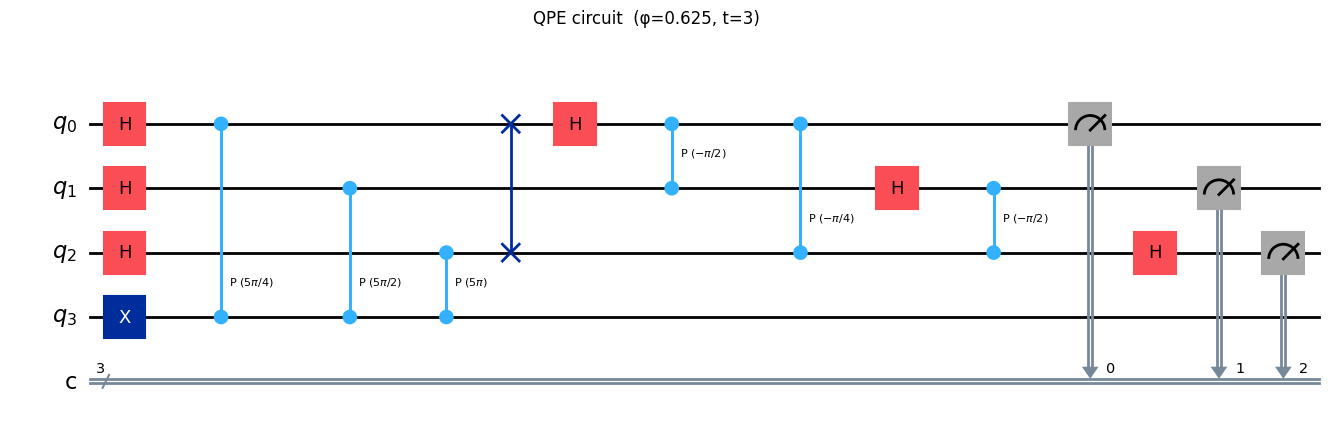

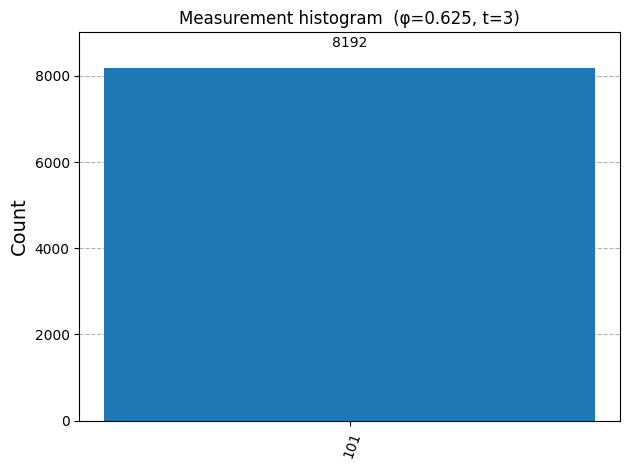

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


t=4  | k=1010 | φ̂=0.625000 | |φ̂-φ|=0.000000


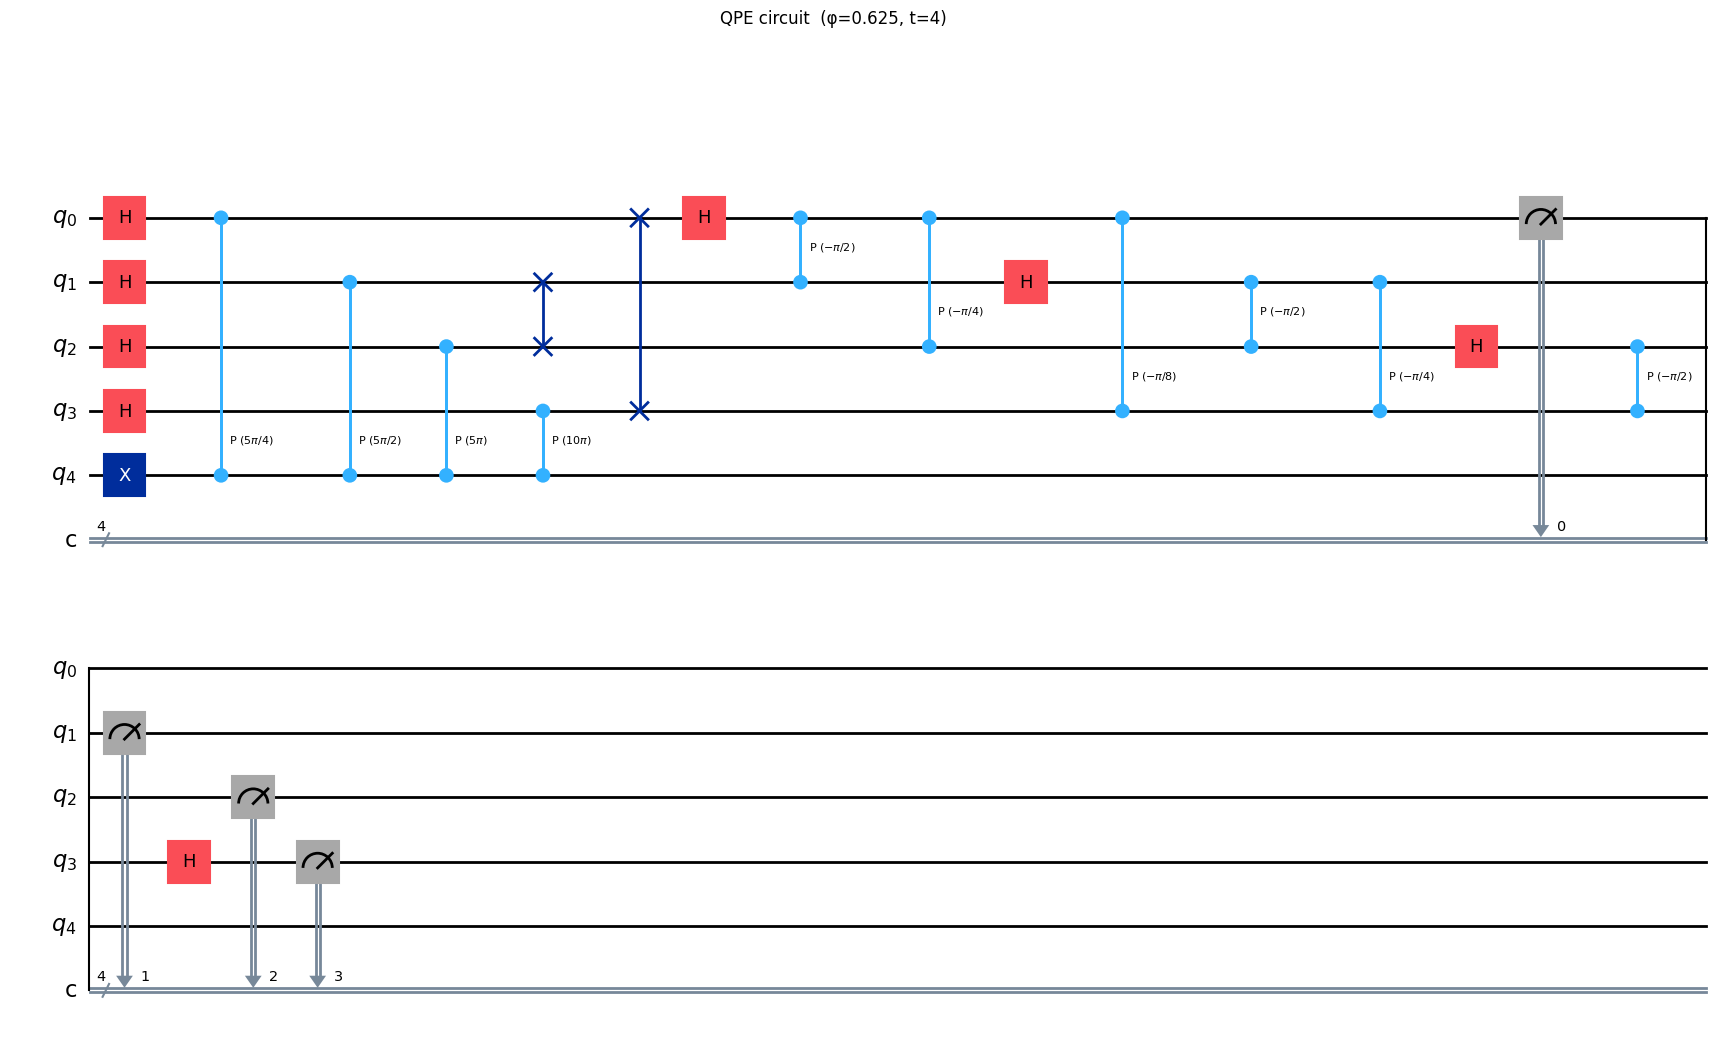

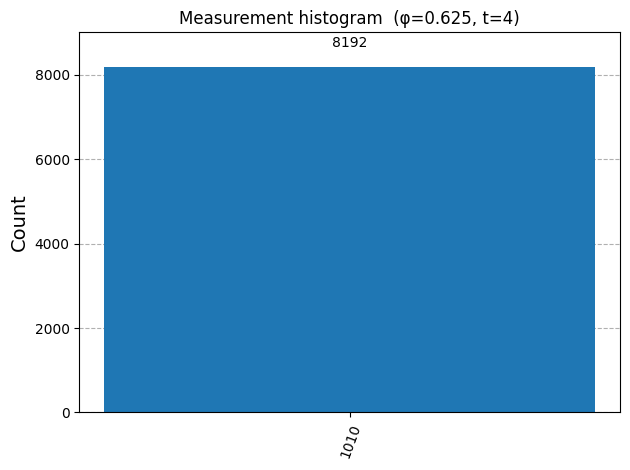

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


t=5  | k=10100 | φ̂=0.625000 | |φ̂-φ|=0.000000


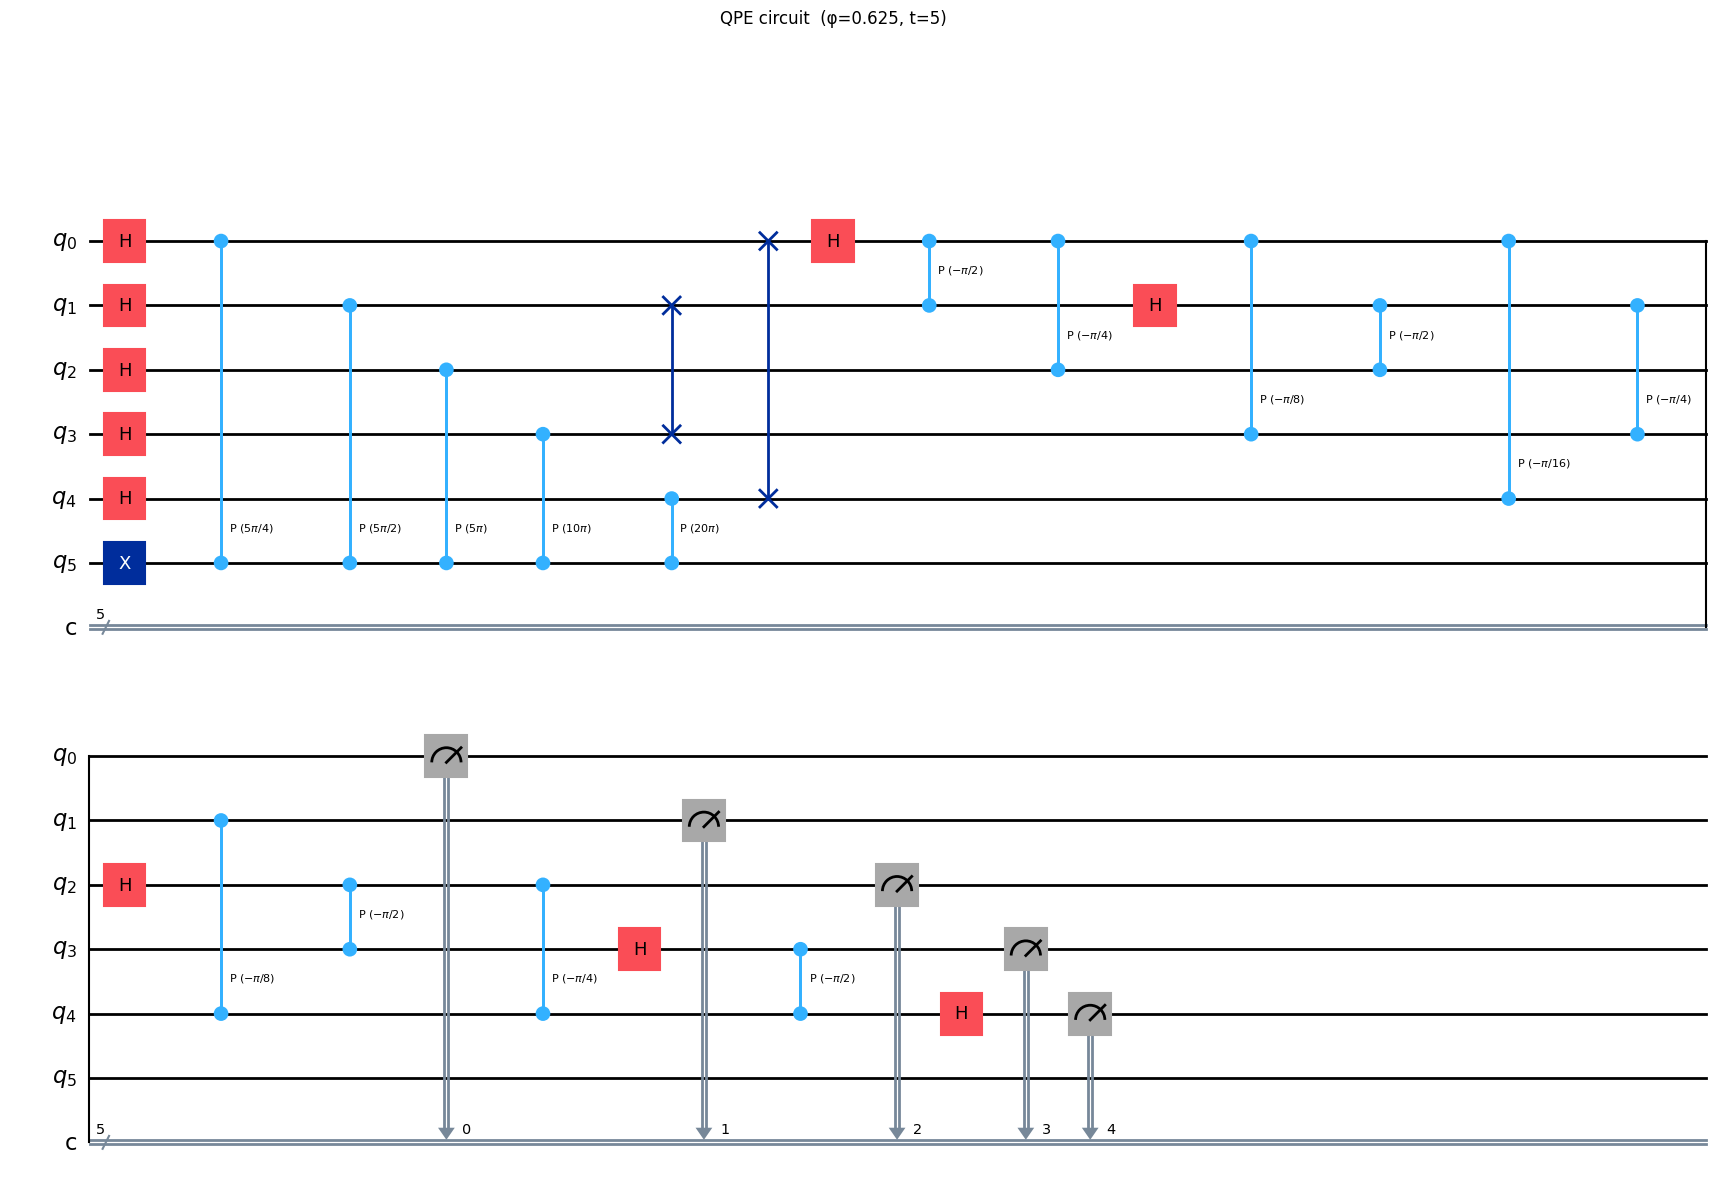

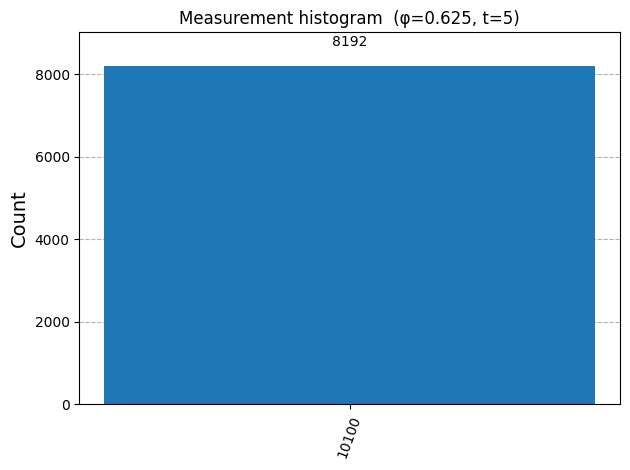

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


t=6  | k=101000 | φ̂=0.625000 | |φ̂-φ|=0.000000


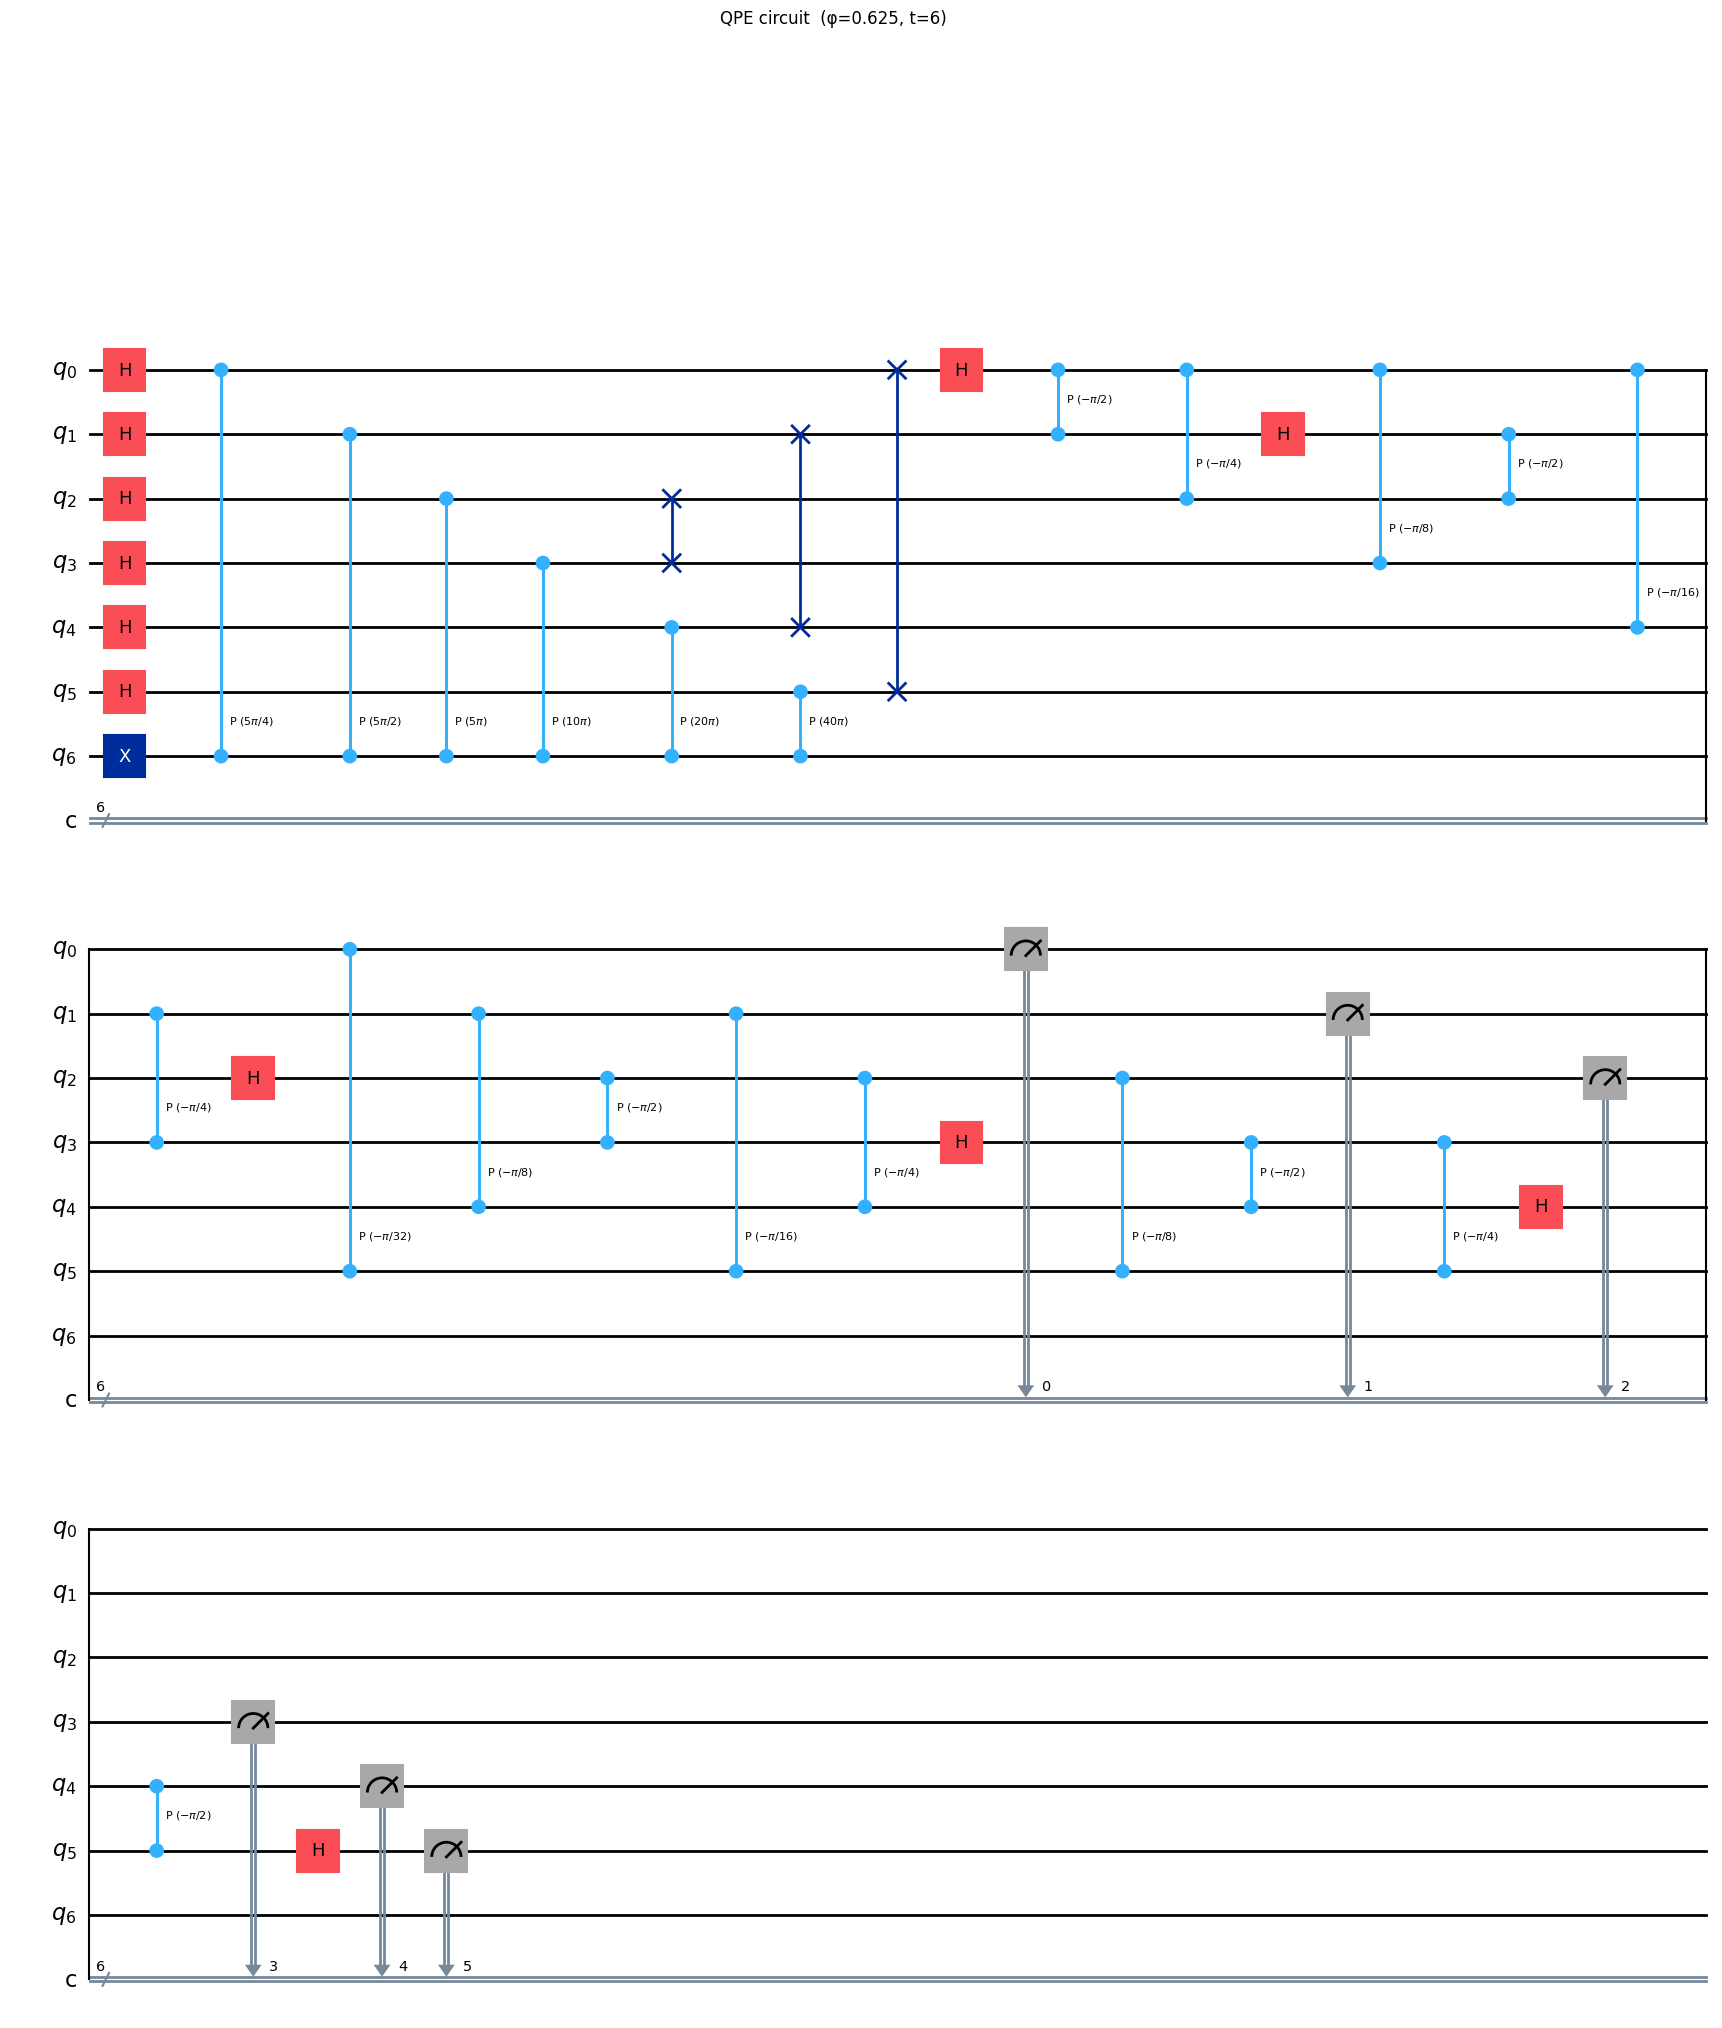

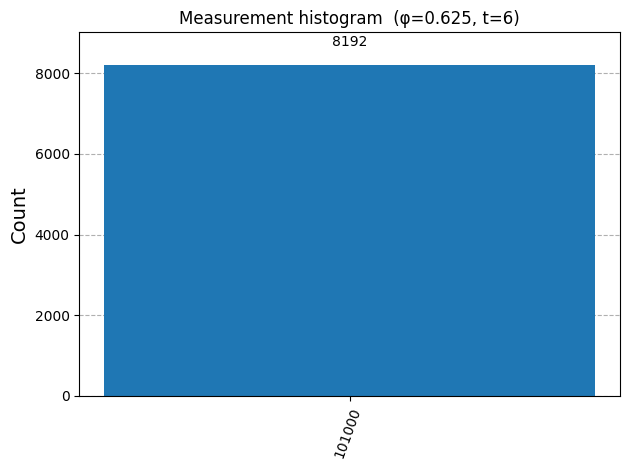

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


t=7  | k=1010000 | φ̂=0.625000 | |φ̂-φ|=0.000000


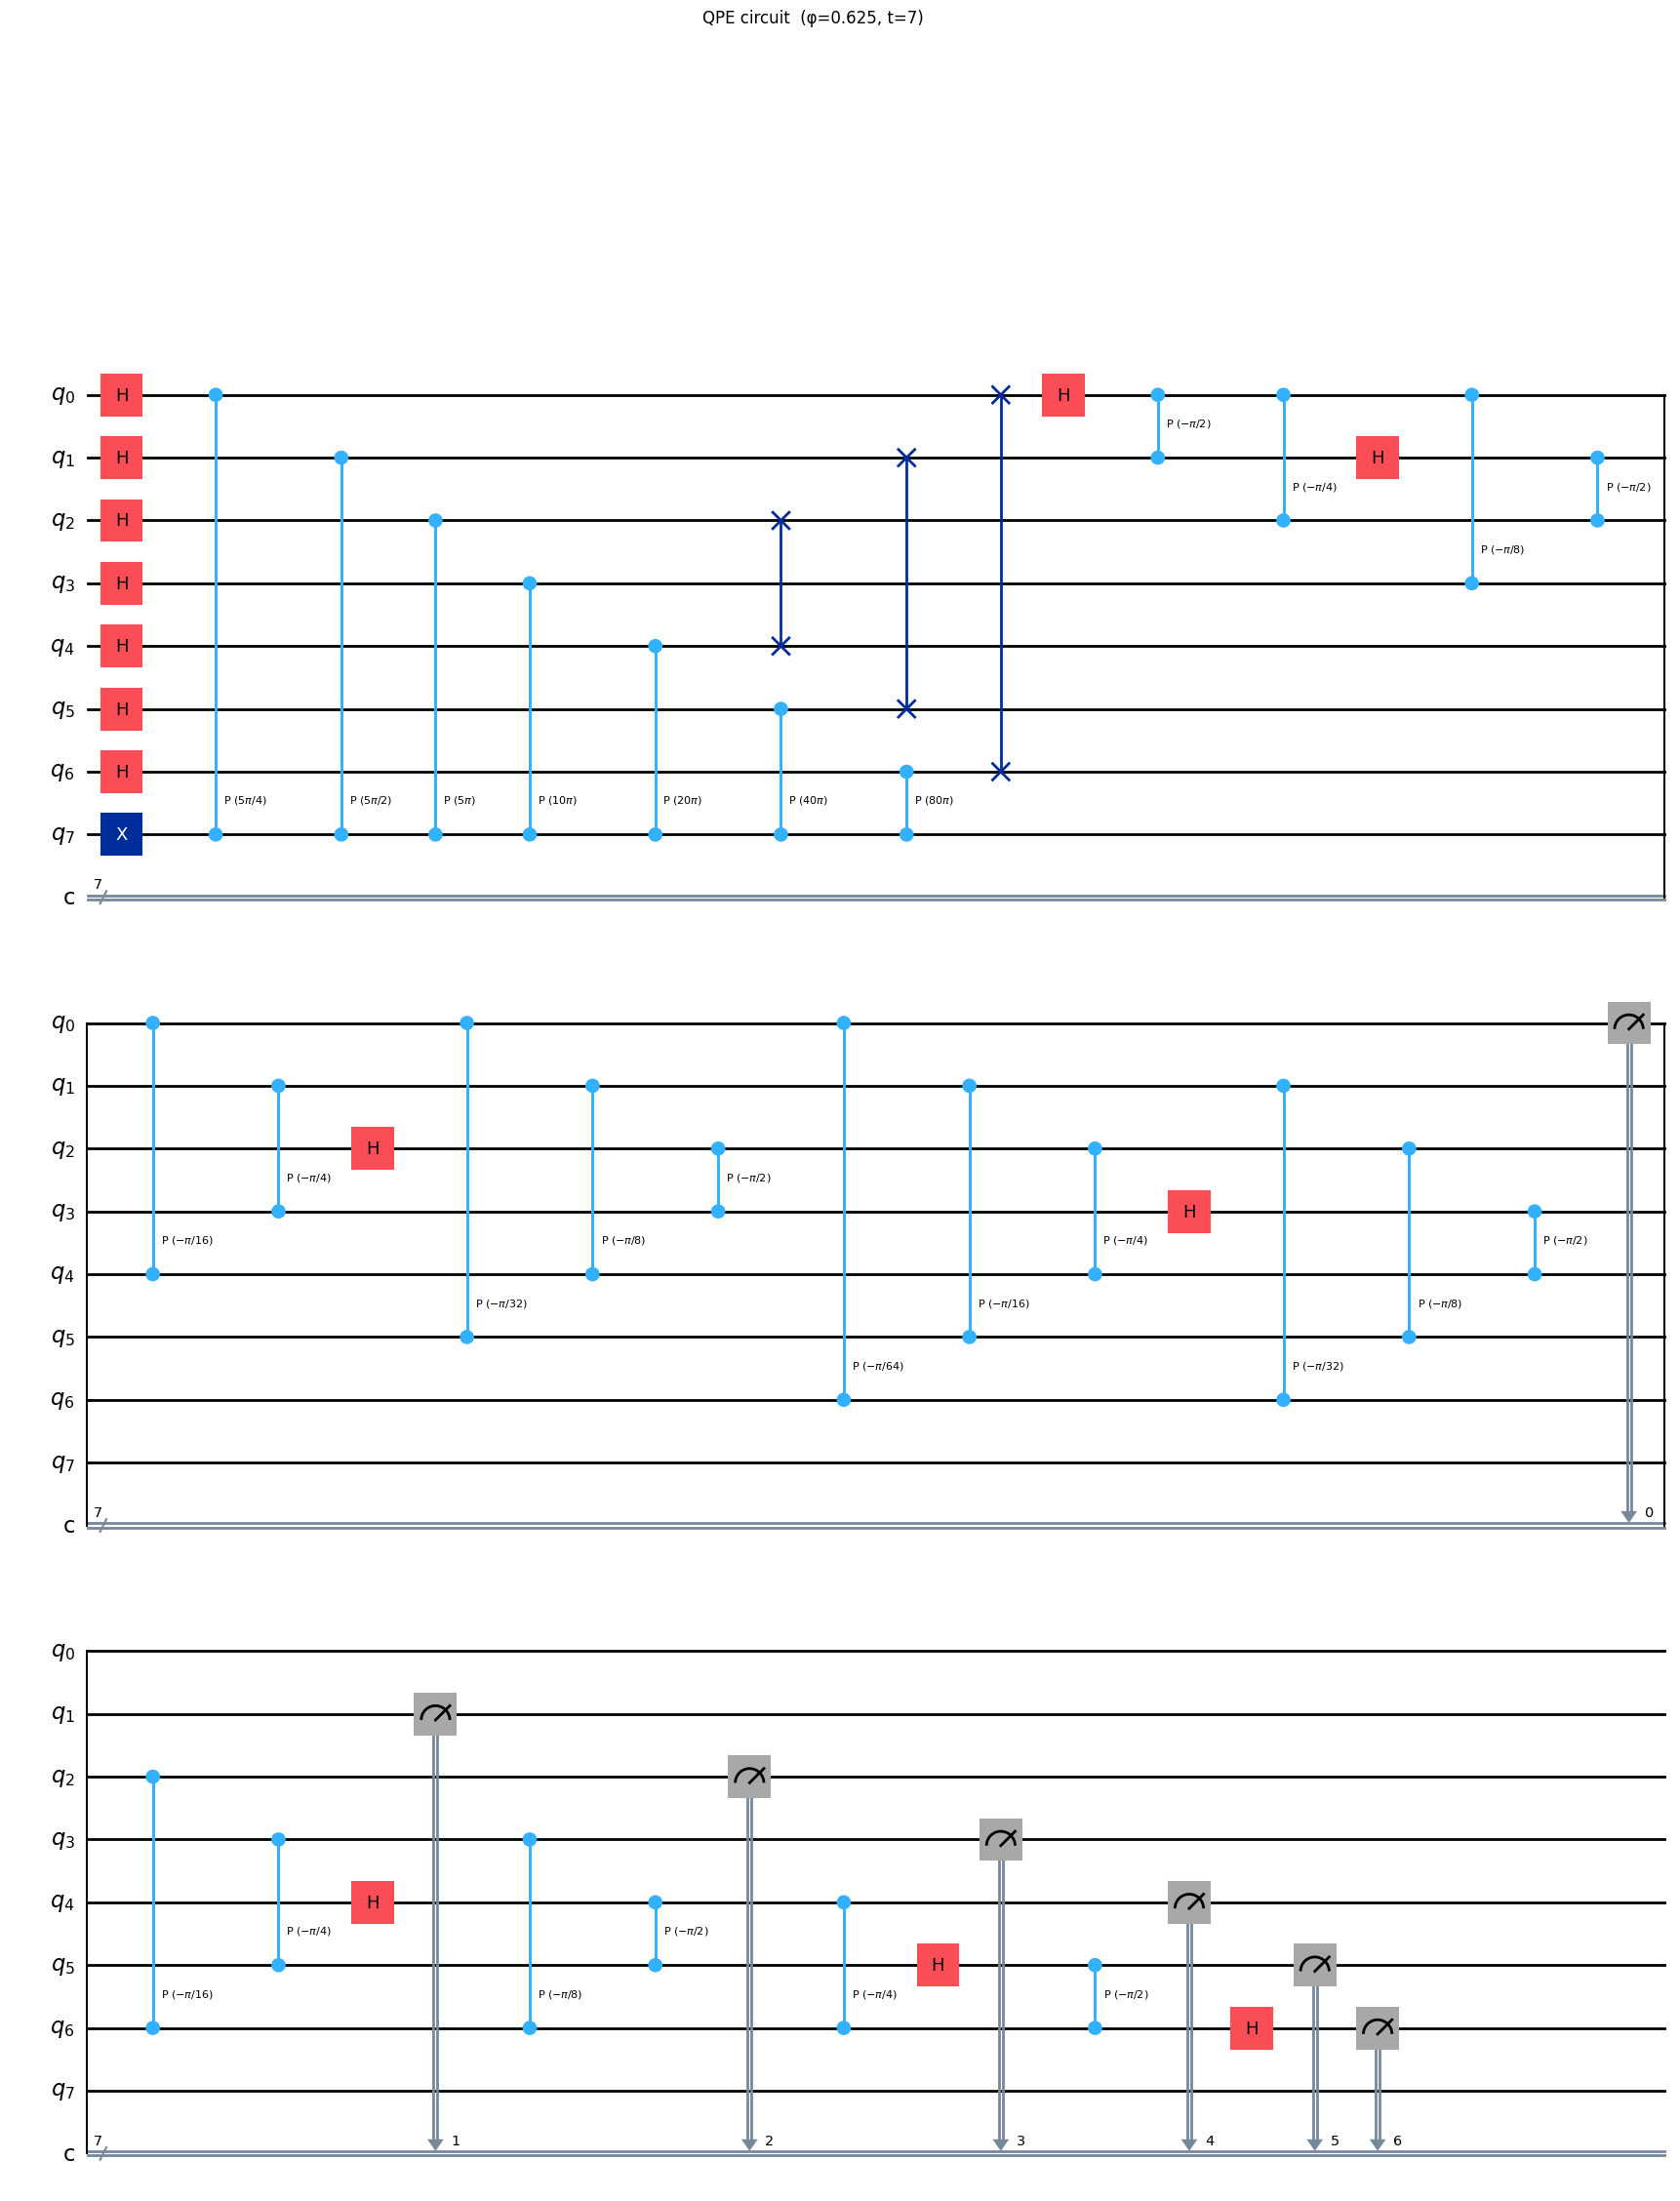

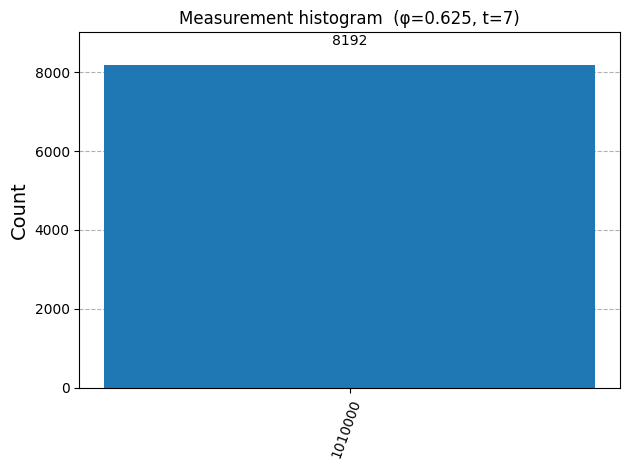

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


t=8  | k=10100000 | φ̂=0.625000 | |φ̂-φ|=0.000000


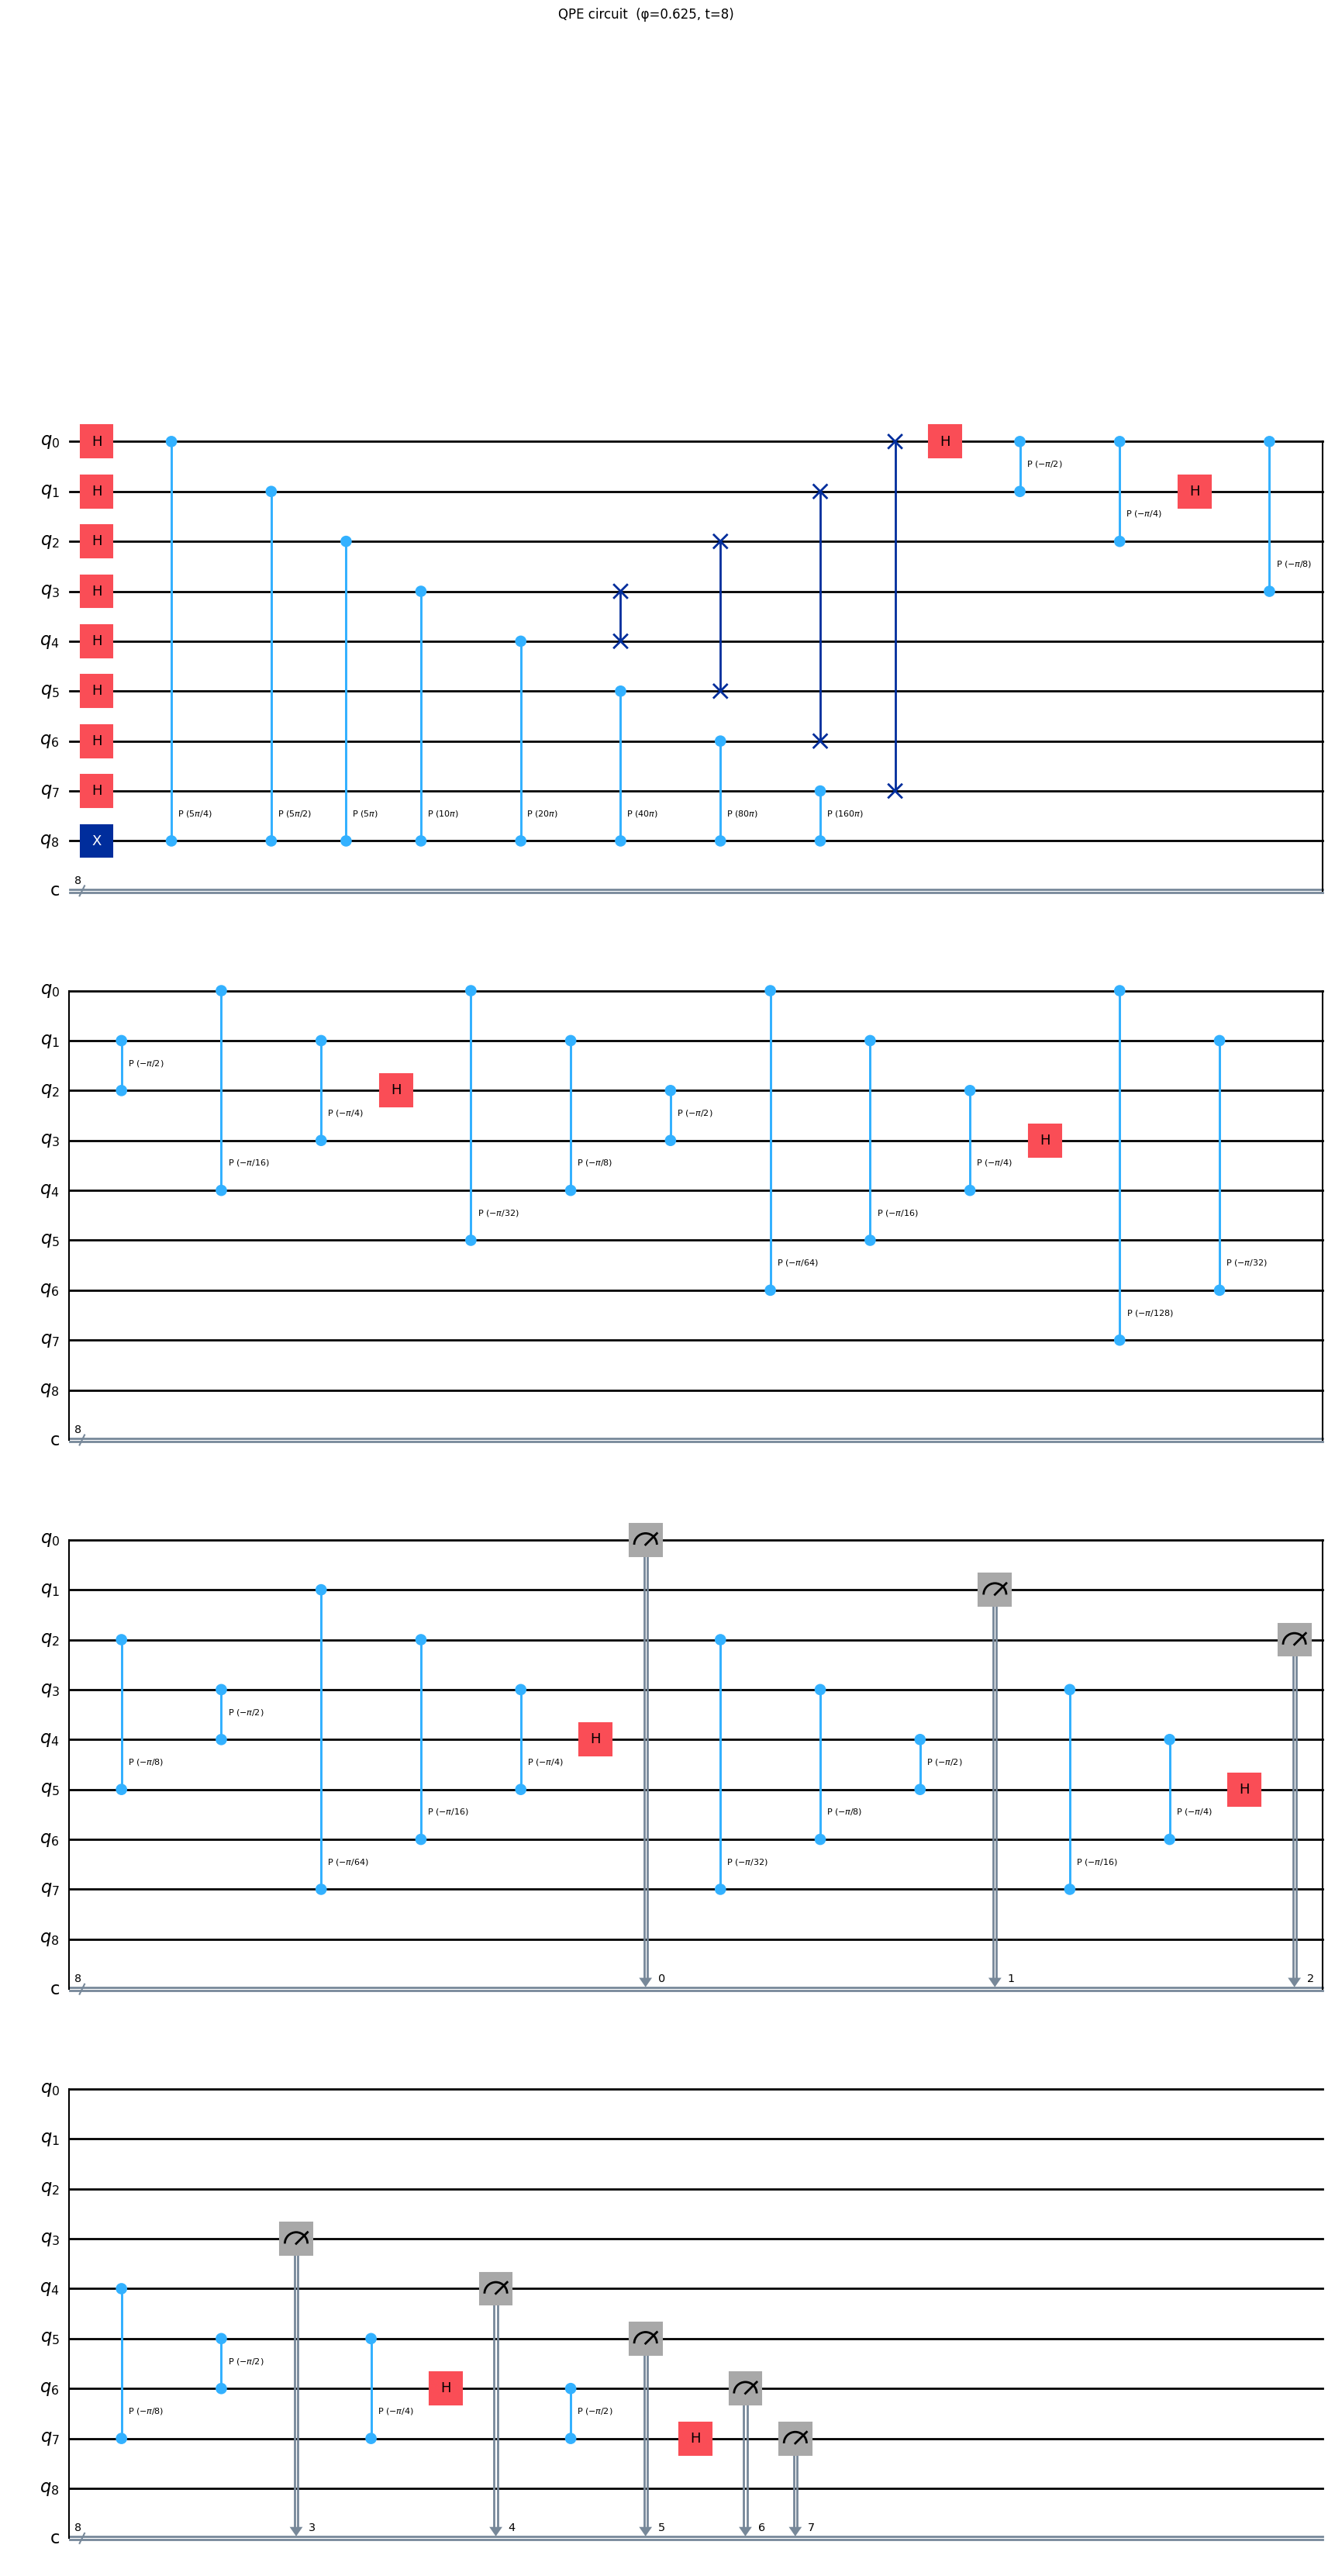

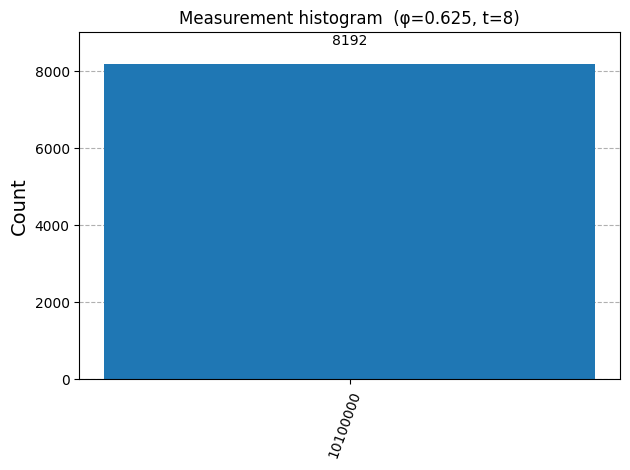


===== φ = 0.428571428571429 =====
t=3  | k=011 | φ̂=0.375000 | |φ̂-φ|=0.053571


C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


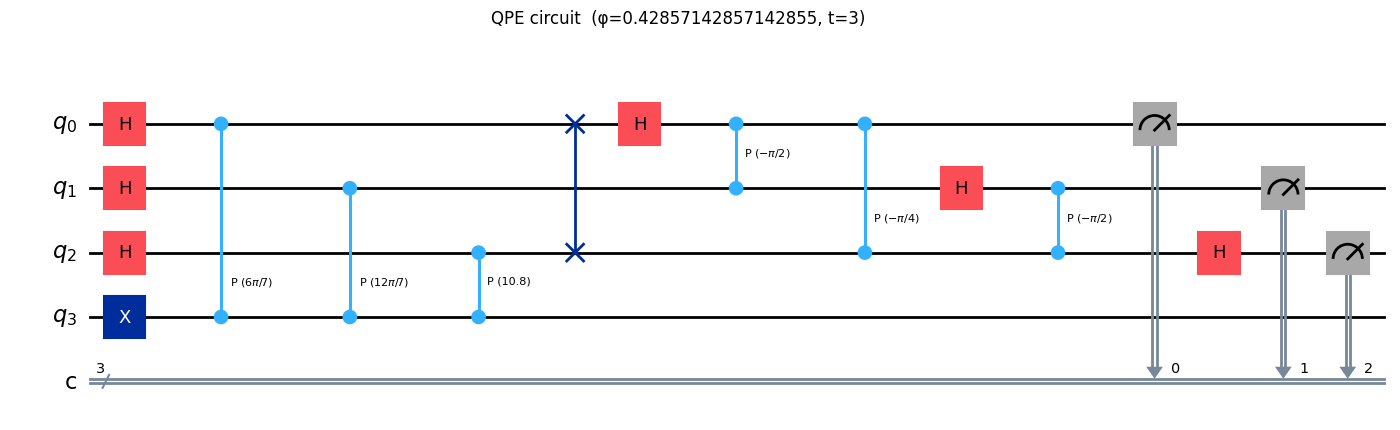

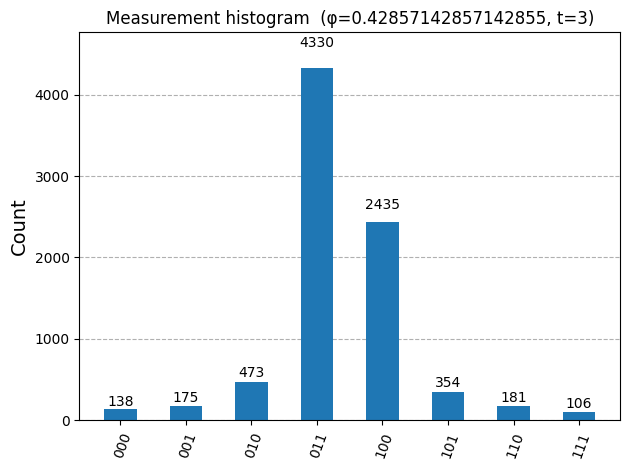

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


t=4  | k=0111 | φ̂=0.437500 | |φ̂-φ|=0.008929


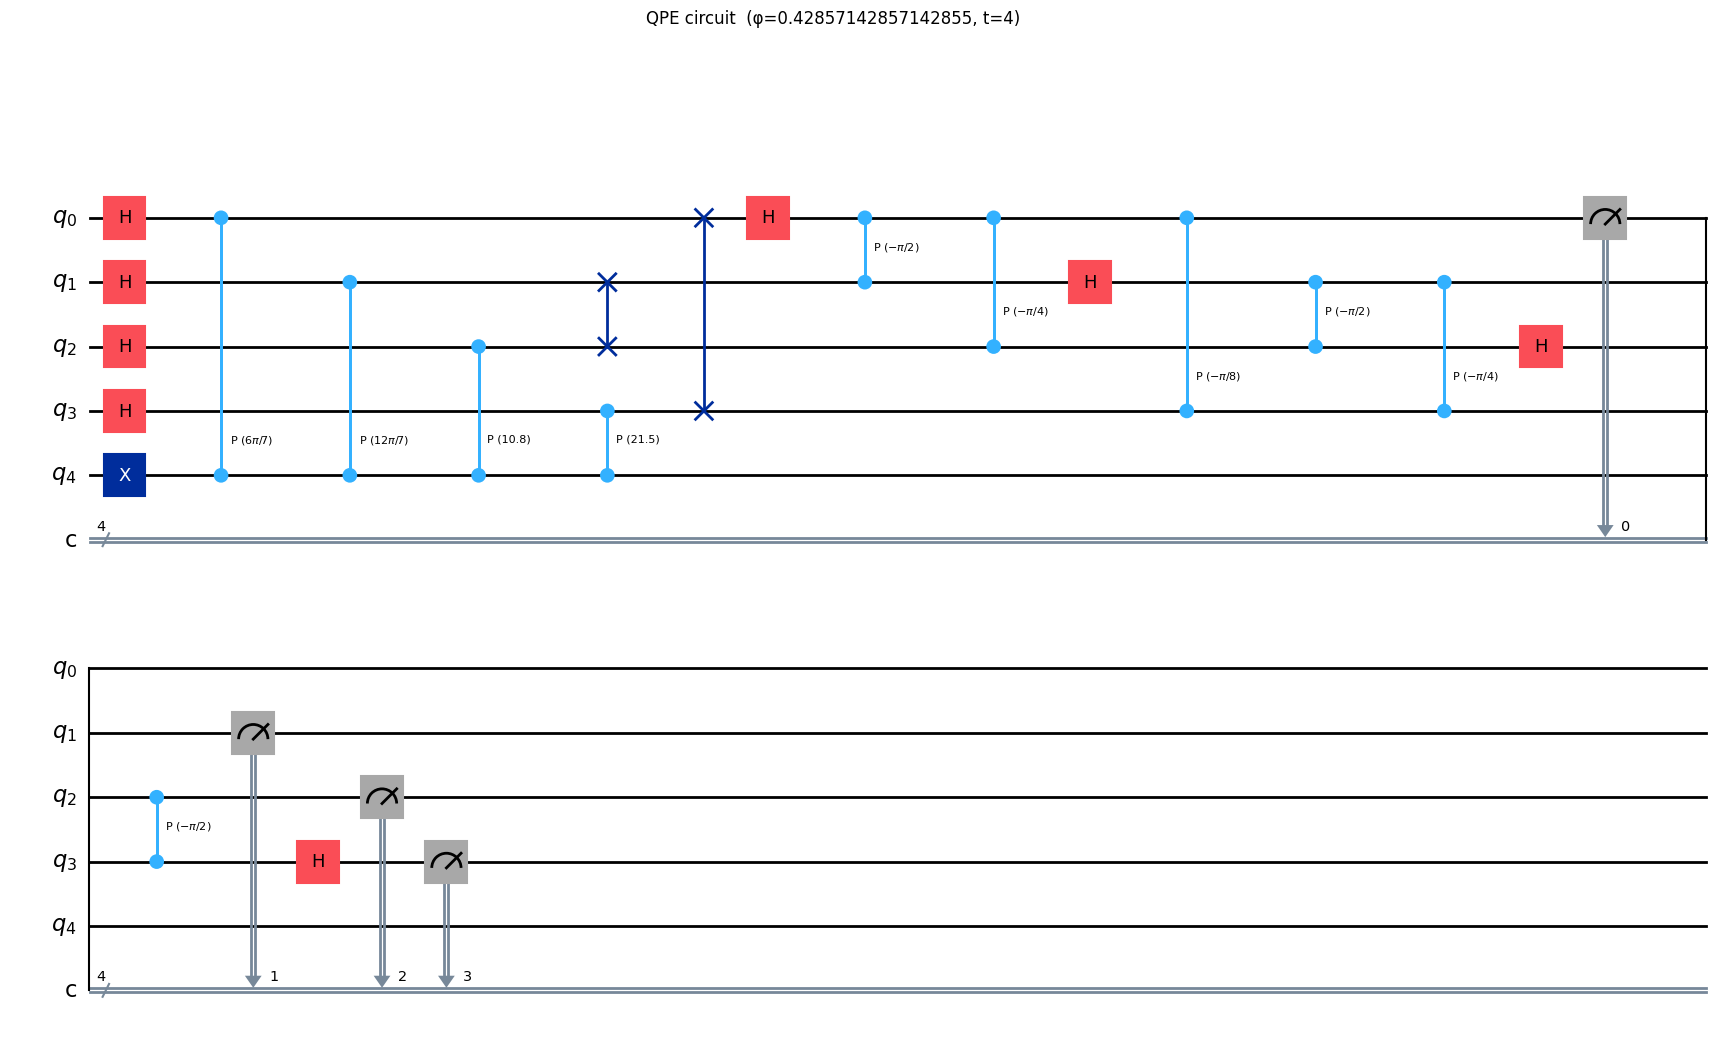

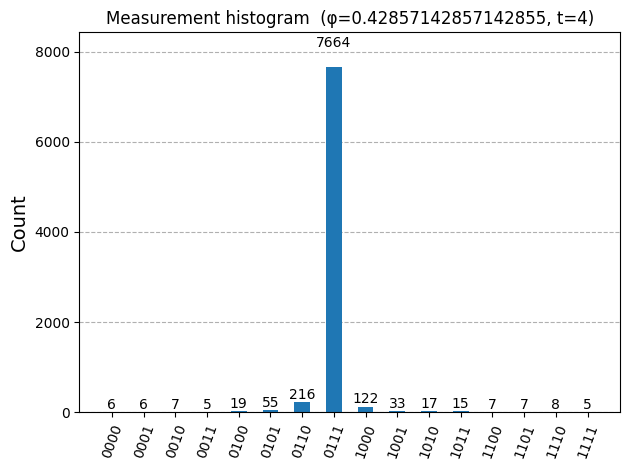

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


t=5  | k=01110 | φ̂=0.437500 | |φ̂-φ|=0.008929


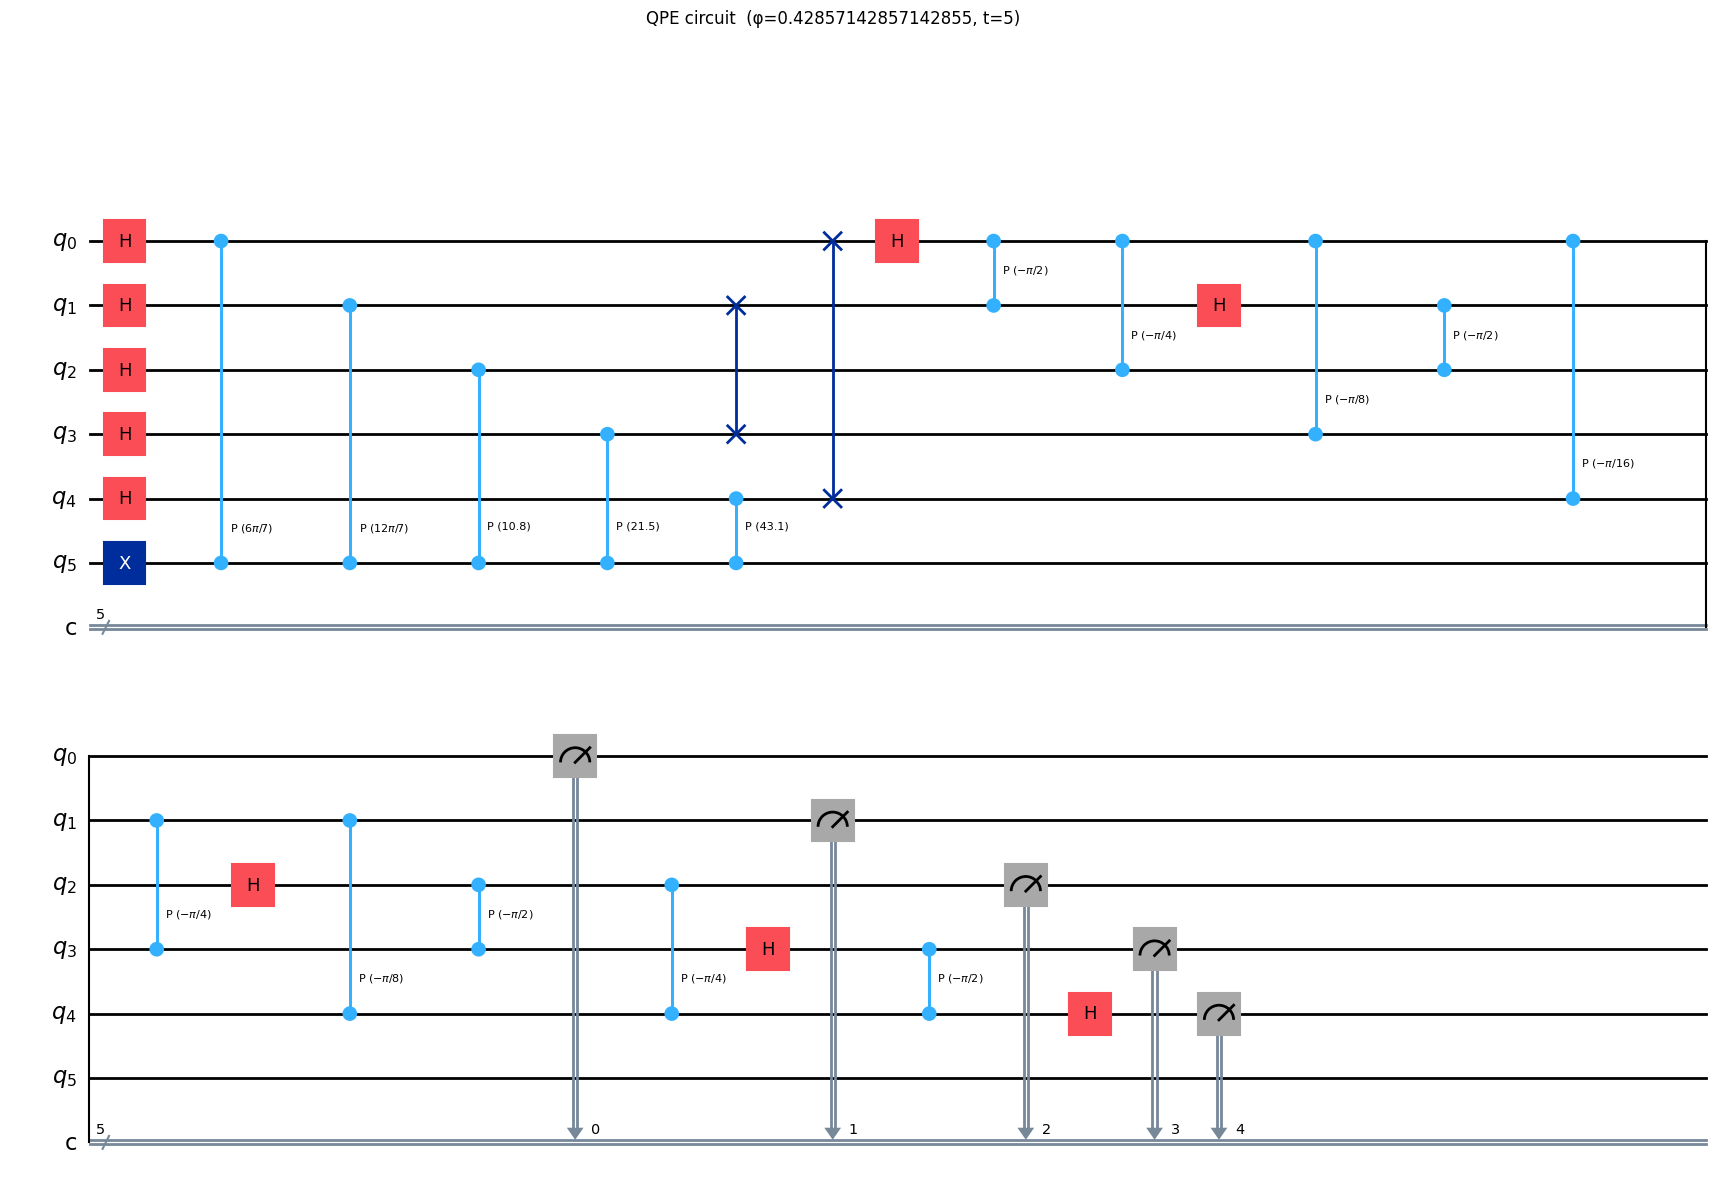

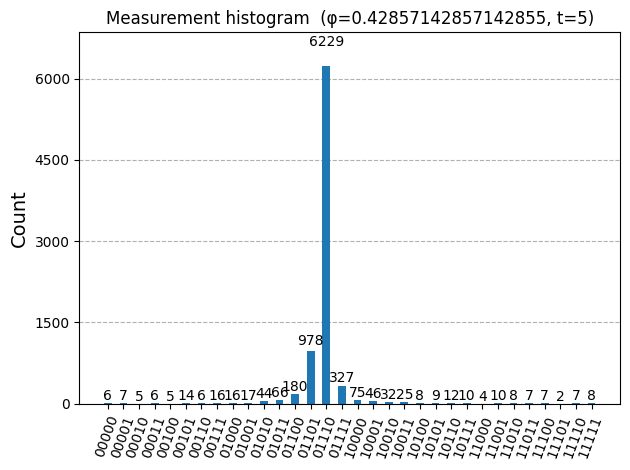

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


t=6  | k=011011 | φ̂=0.421875 | |φ̂-φ|=0.006696


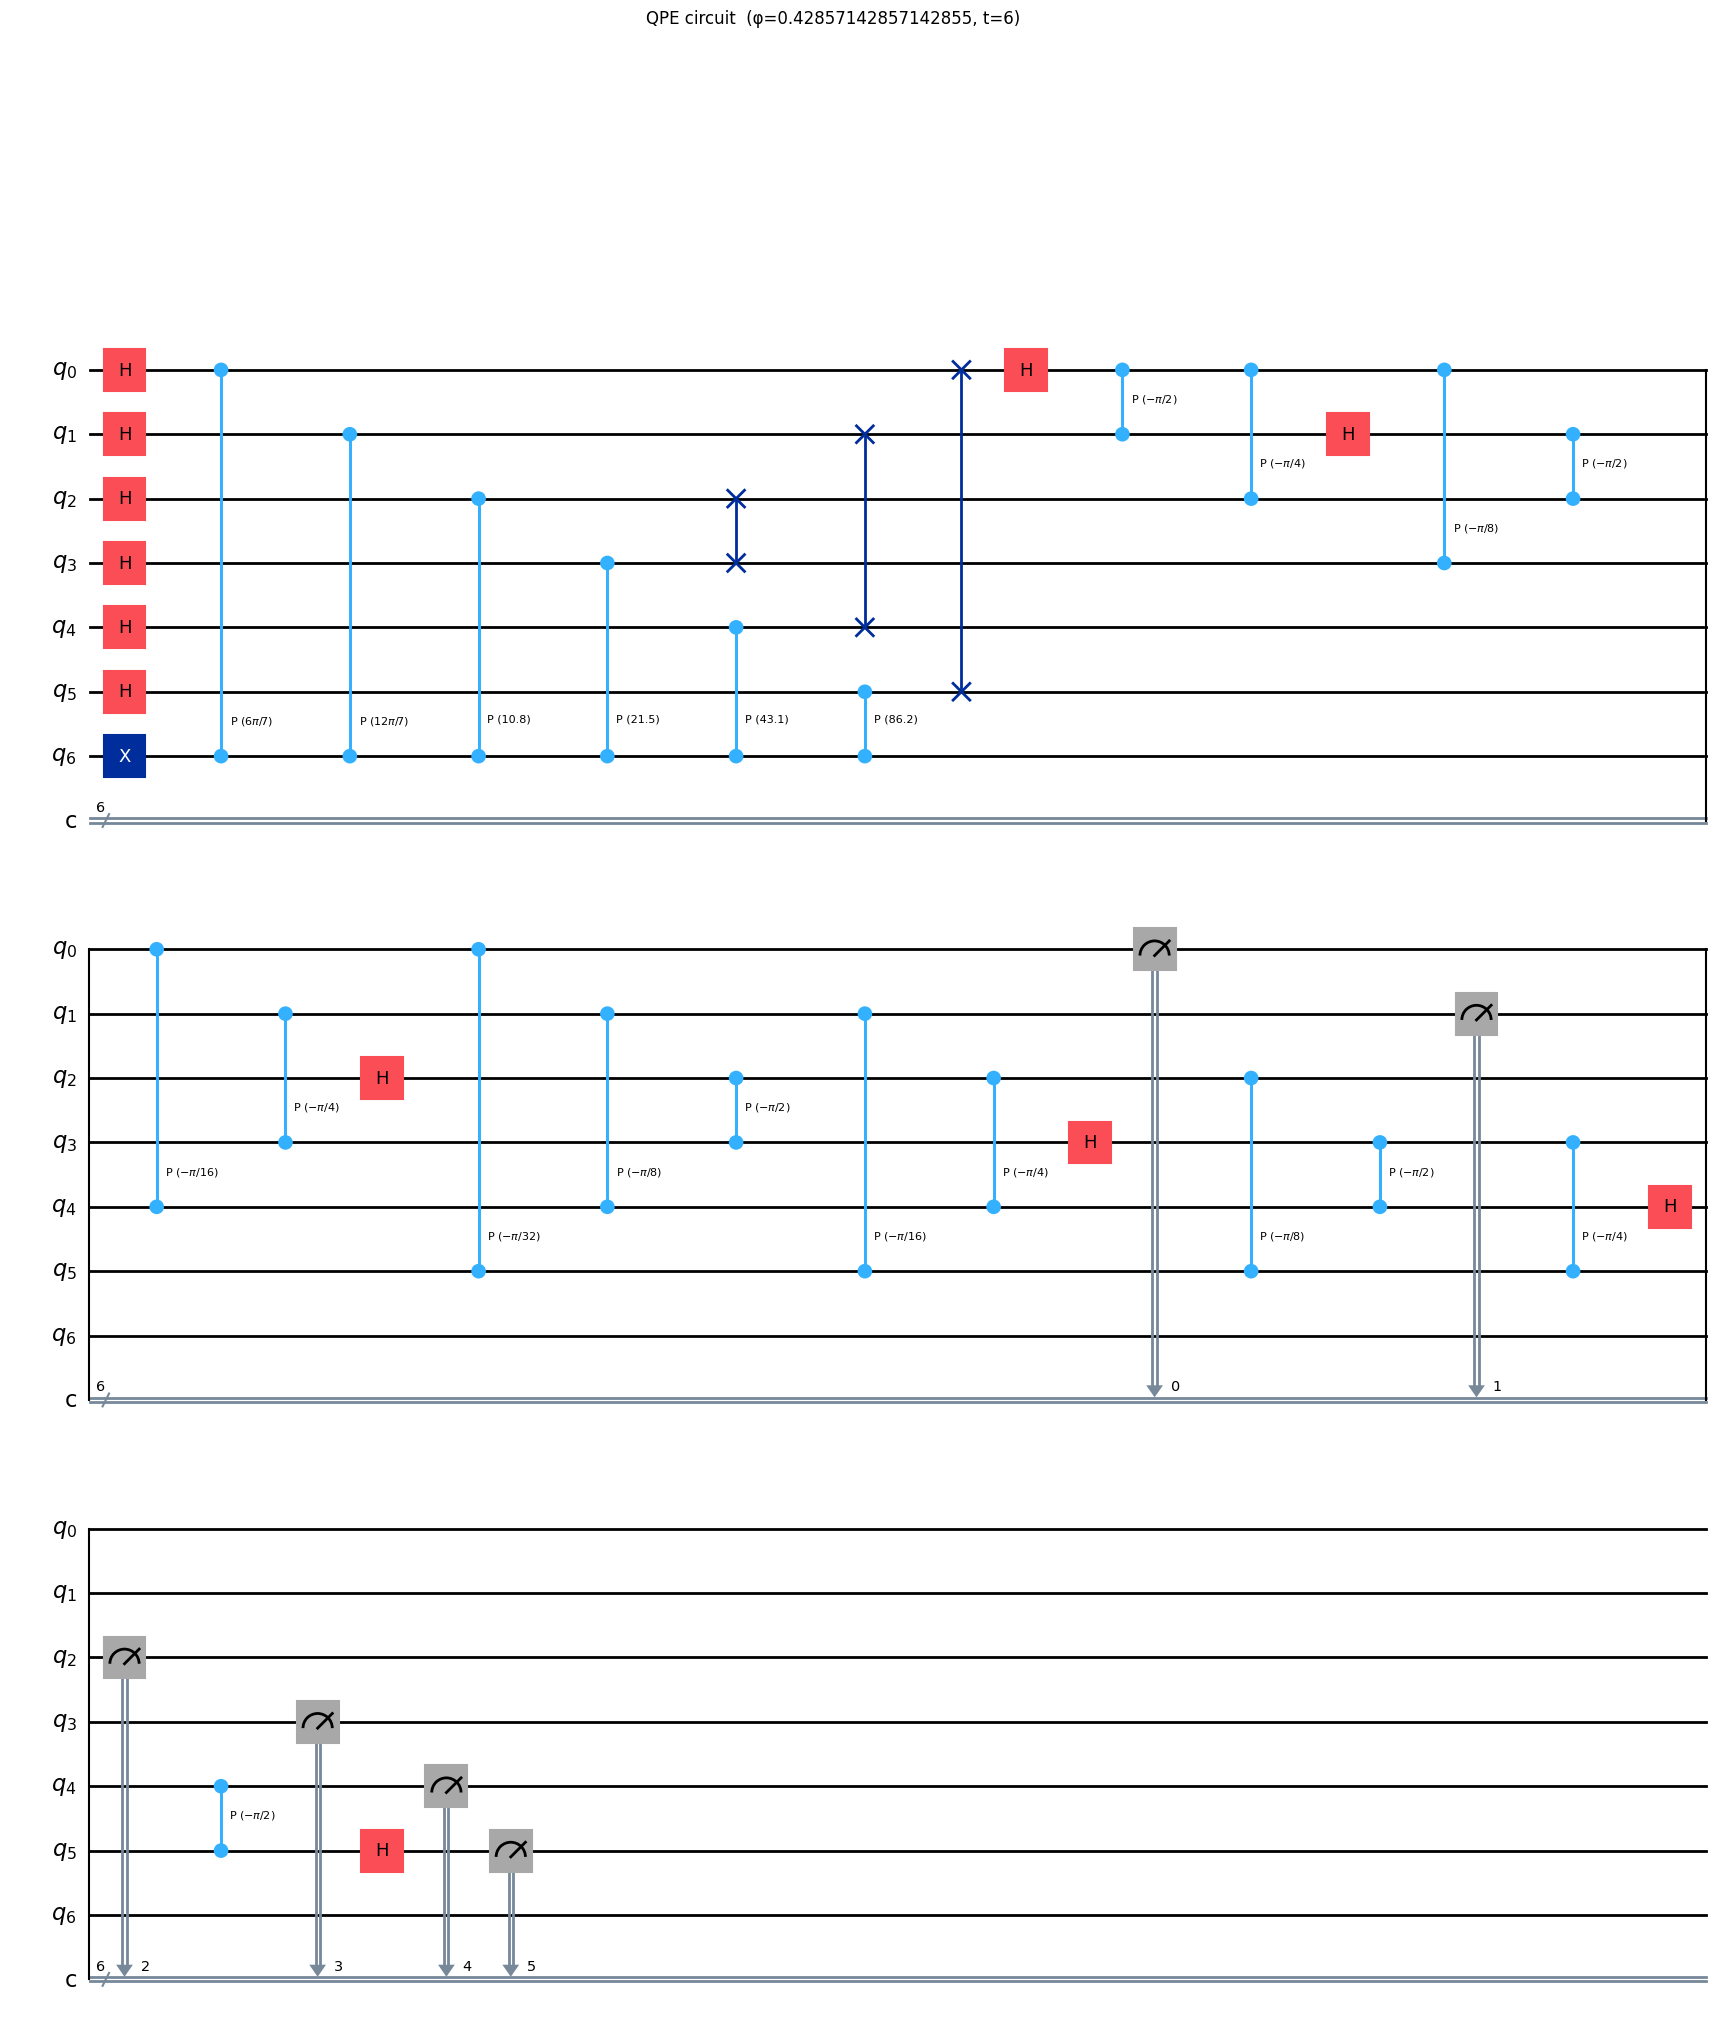

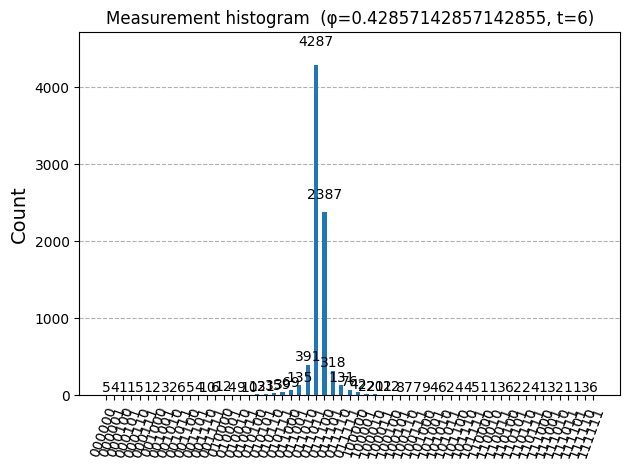

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


t=7  | k=0110111 | φ̂=0.429688 | |φ̂-φ|=0.001116


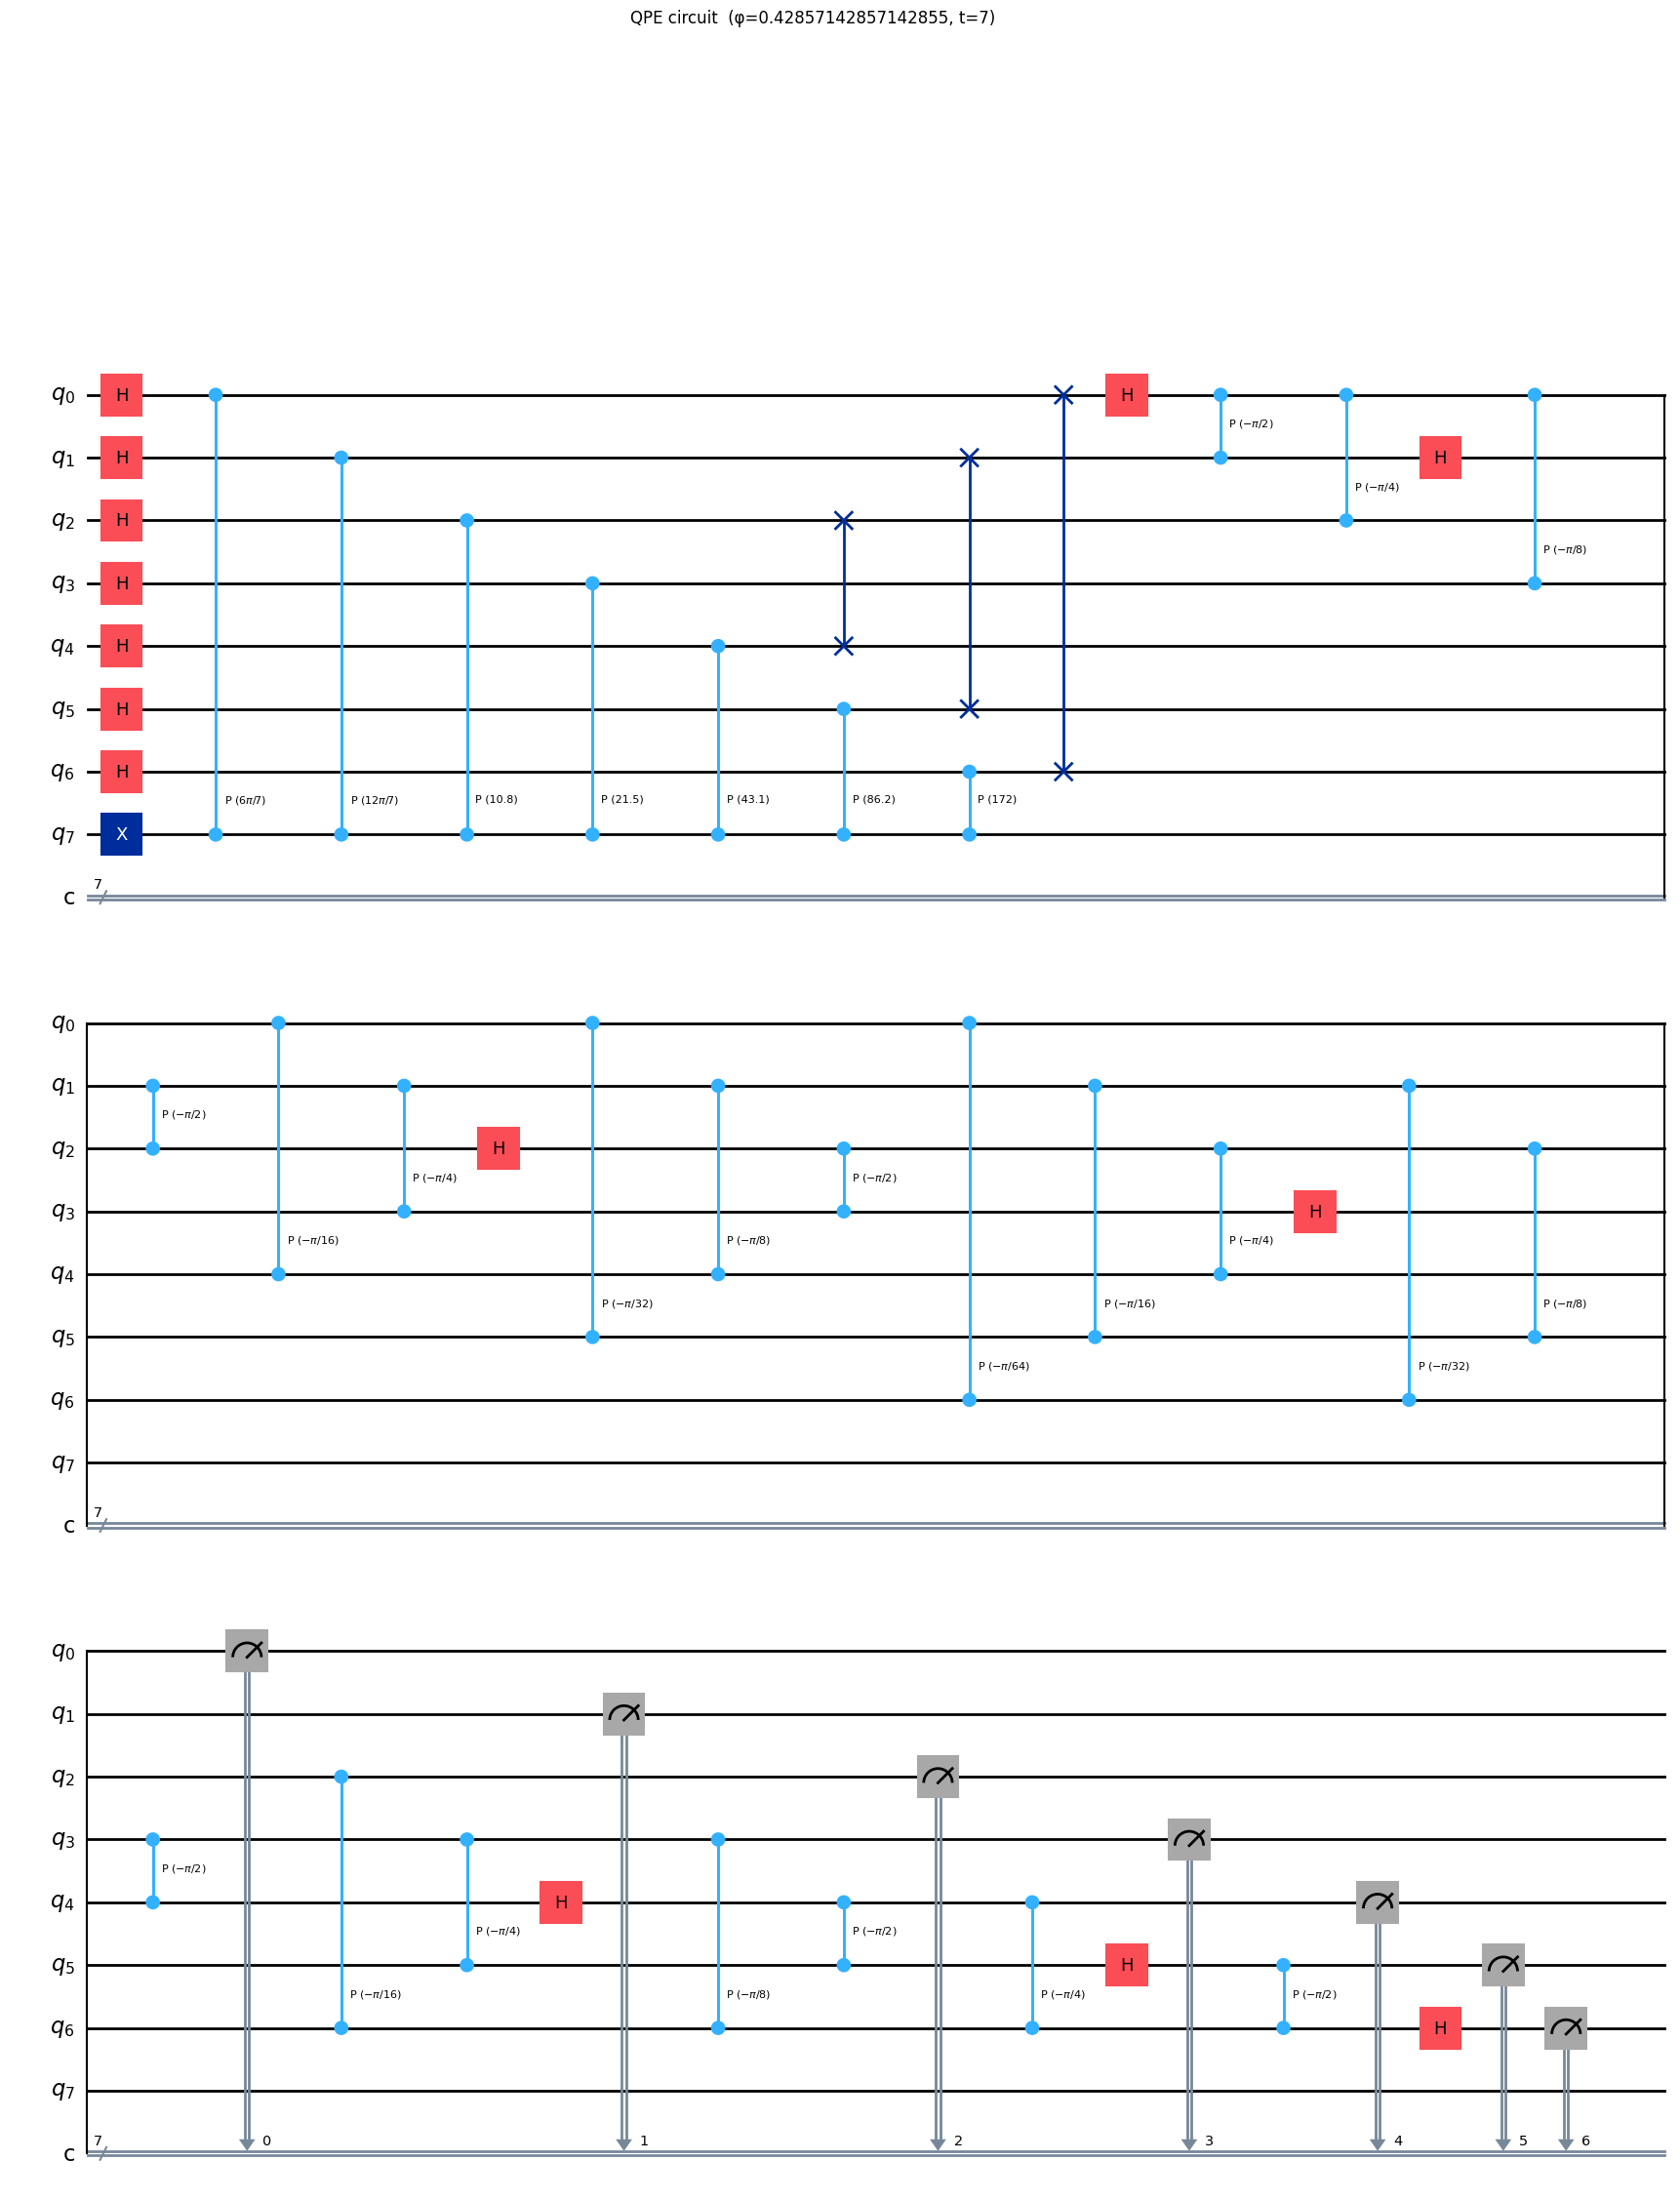

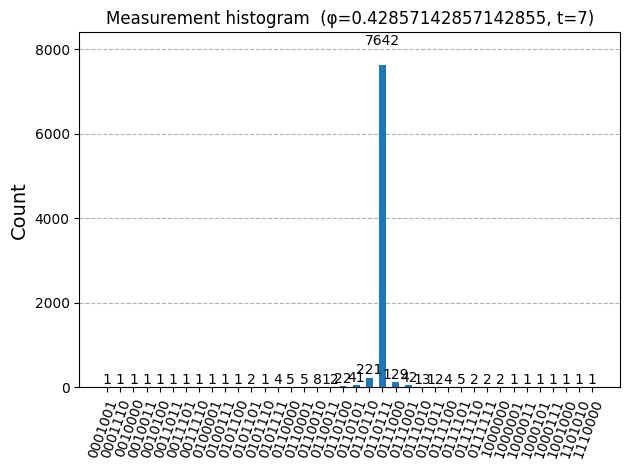

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\958543709.py:16: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(n, do_swaps=True).decompose().inverse()


t=8  | k=01101110 | φ̂=0.429688 | |φ̂-φ|=0.001116


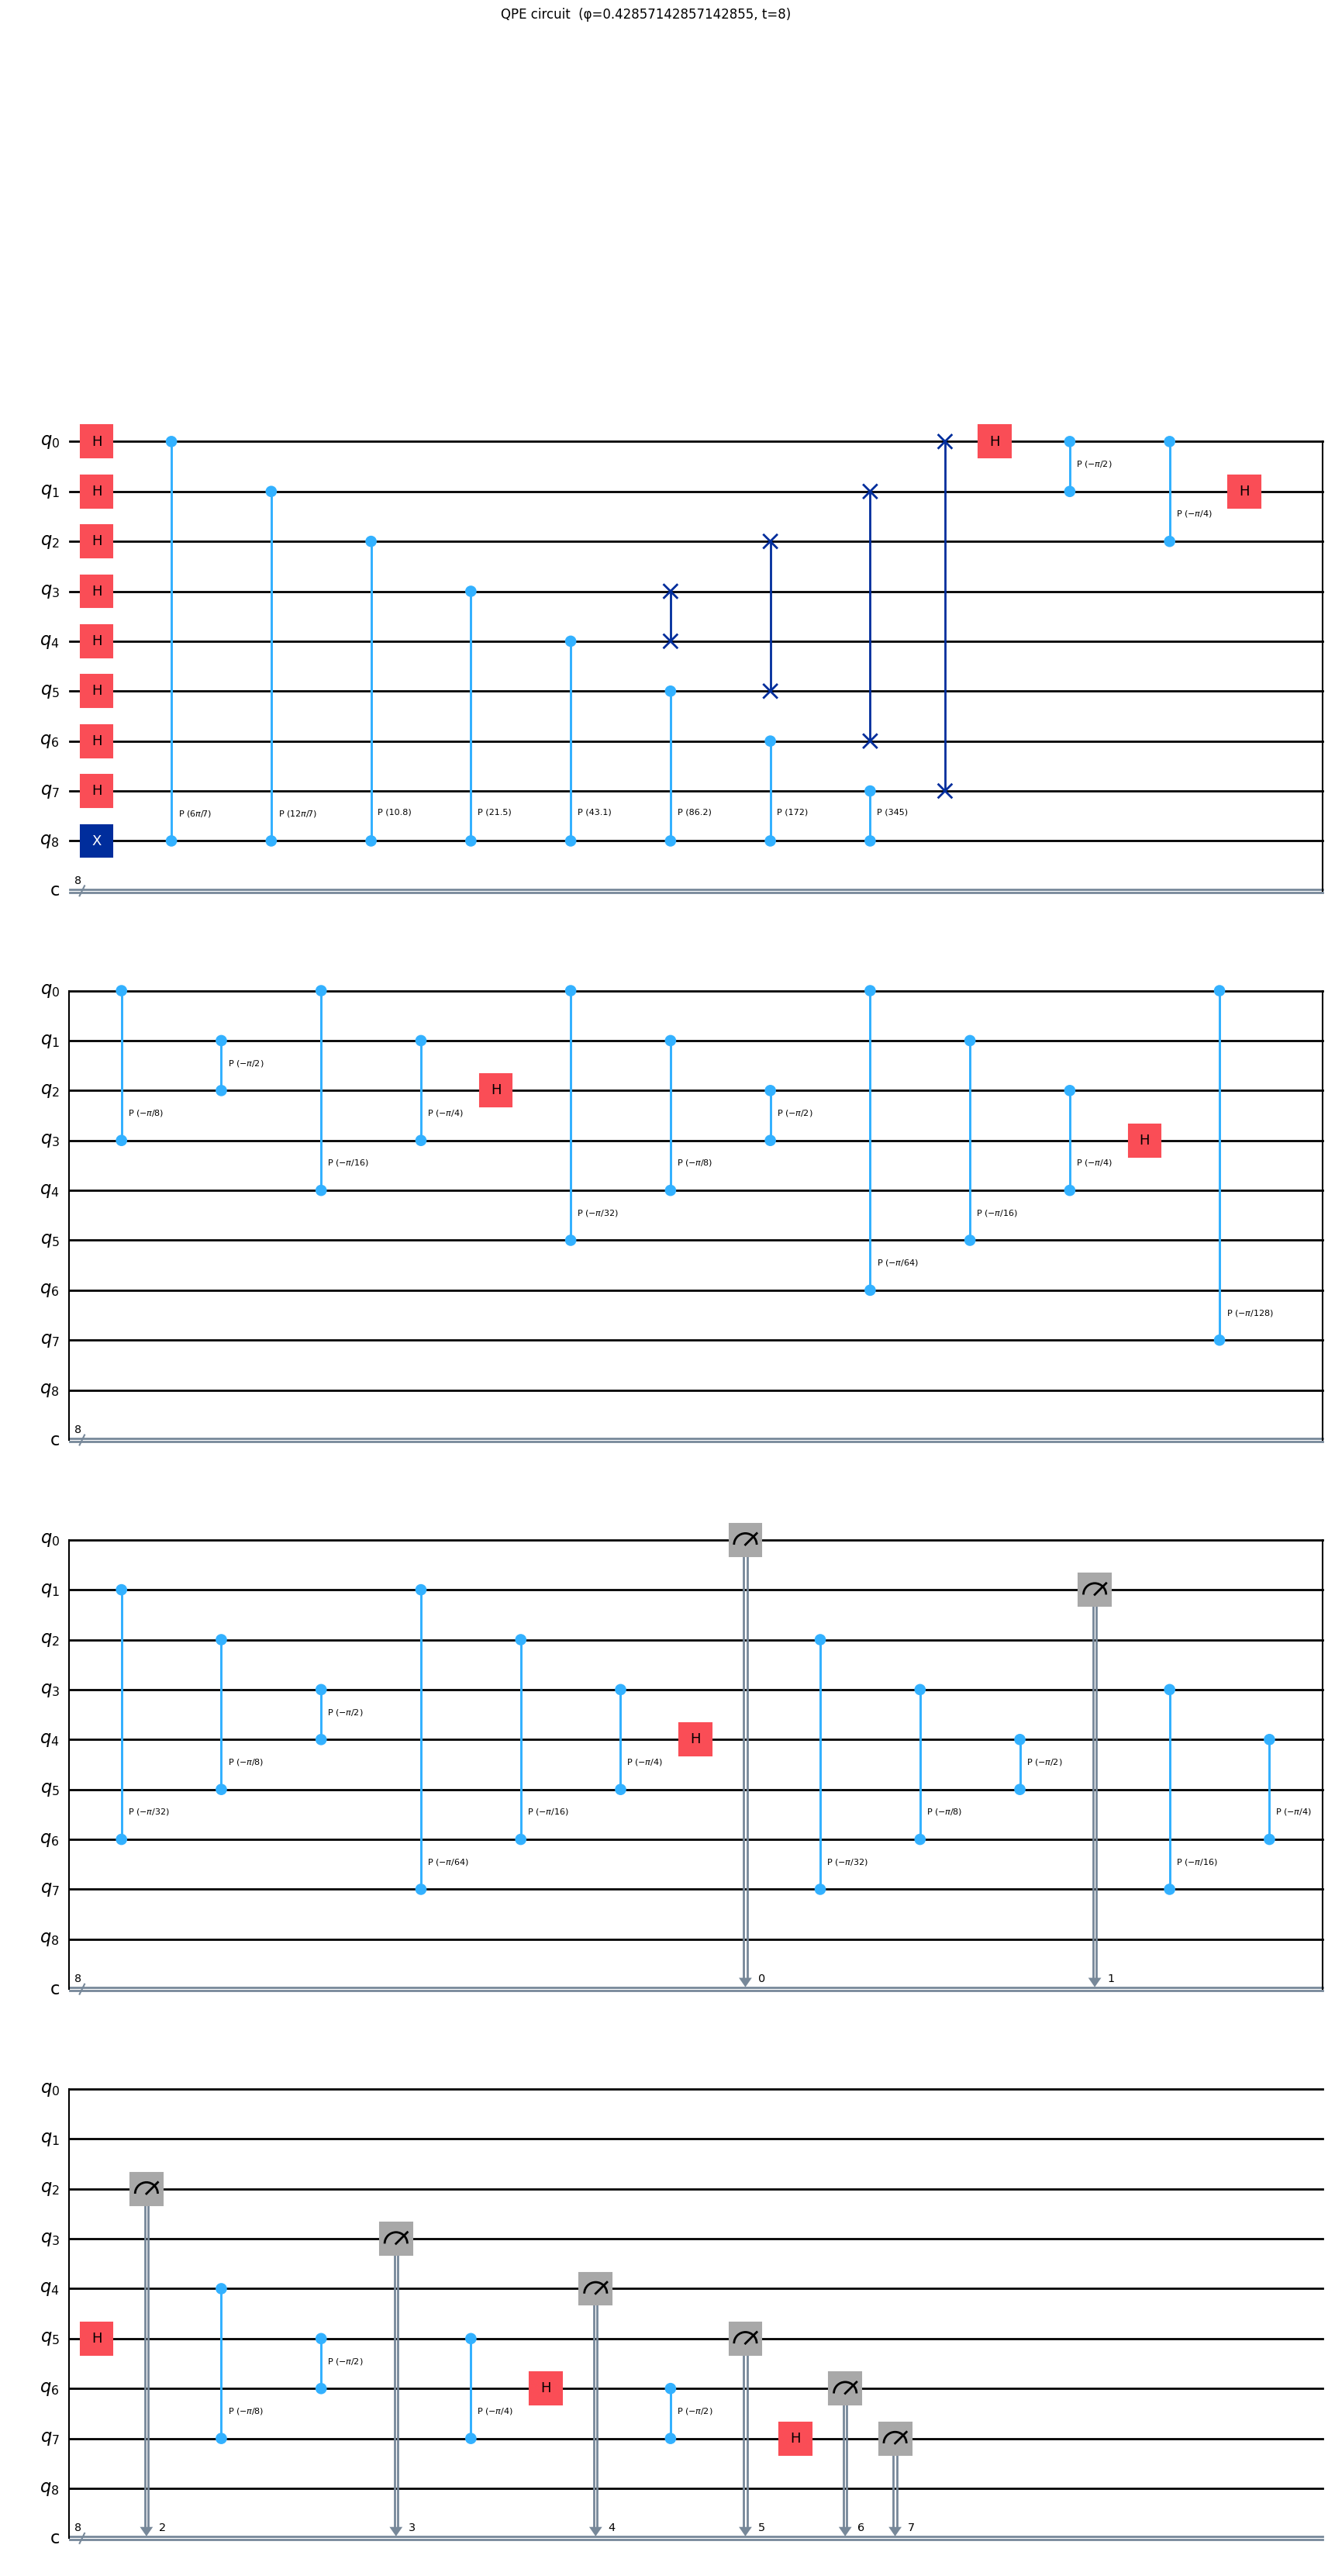

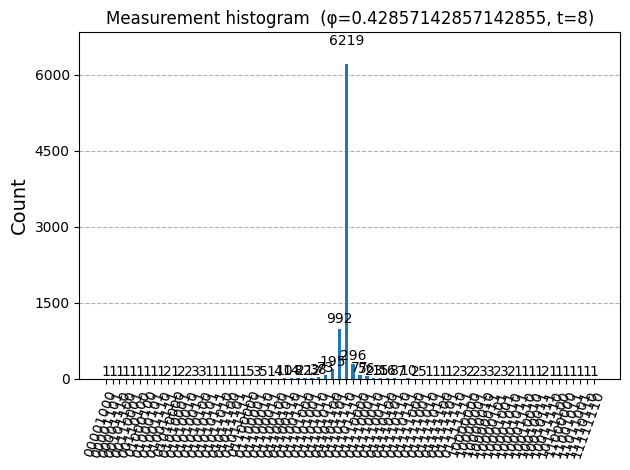

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT         

# inverse QFT 
def inverse_qft(circ, qs):

    n = len(qs)
    iqft = QFT(n, do_swaps=True).decompose().inverse()
    circ.compose(iqft, qubits=qs, inplace=True)

# QPE Circuit
def build_qpe(phi, t):
    qc = QuantumCircuit(t + 1, t)            
    qc.h(range(t))                           
    qc.x(t)                                  
    for j in range(t):                      
        qc.cp(2 * np.pi * phi * 2 ** j, j, t)
    inverse_qft(qc, list(range(t)))       
    qc.measure(range(t), range(t))         
    return qc

# Experiment Parameter 
phases      = [5 / 8, 3 / 7]      
t_range     = range(3, 9)         
shots       = 8_192
backend     = AerSimulator()

visualize_t = {3,4,5,6,7,8}      


for phi in phases:
    print(f"\n===== φ = {phi:.15f} =====")
    for t in t_range:
        qc      = build_qpe(phi, t)
        counts  = backend.run(transpile(qc, backend), shots=shots).result().get_counts()
        k_bin   = max(counts, key=counts.get)
        k       = int(k_bin, 2)
        est     = k / 2 ** t
        err     = abs(est - phi)
        print(f"t={t:<2} | k={k_bin:<{t}} | φ̂={est:0.6f} | |φ̂-φ|={err:0.6f}")

        if t in visualize_t:
            qc.draw("mpl")
            plt.suptitle(f"QPE circuit  (φ={phi}, t={t})", y=1.02)
            plt.show()

            plot_histogram(counts, title=f"Measurement histogram  (φ={phi}, t={t})")
            plt.show()


C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\2610625506.py:9: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  circ.compose(QFT(len(qs), do_swaps=True).decompose().inverse(),


t=3,  weighted phase-error = 9.576416e-02
t=4,  weighted phase-error = 1.622881e-02
t=5,  weighted phase-error = 2.173832e-02
t=6,  weighted phase-error = 1.831354e-02
t=7,  weighted phase-error = 2.850805e-03
t=8,  weighted phase-error = 3.719943e-03
t=9,  weighted phase-error = 2.946751e-03
t=10,  weighted phase-error = 4.912104e-04
t=11,  weighted phase-error = 4.960384e-04
t=12,  weighted phase-error = 4.723838e-04


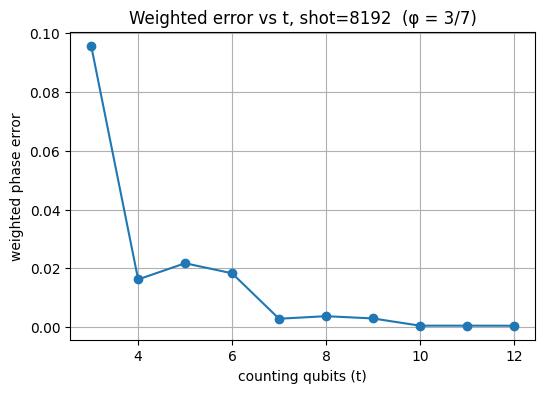

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT

# inverse QFT
def inverse_qft(circ, qs):
    circ.compose(QFT(len(qs), do_swaps=True).decompose().inverse(),
                 qubits=qs, inplace=True)

# QPE Circuit
def build_qpe(phi, t):
    qc = QuantumCircuit(t + 1, t)
    qc.h(range(t))
    qc.x(t)
    for j in range(t):
        qc.cp(2*np.pi*phi*2**j, j, t)
    inverse_qft(qc, list(range(t)))
    qc.measure(range(t), range(t))
    return qc

# Experiment Parameter 
phi        = 3/7
t_range    = range(3, 13)
shots      = 8192
backend    = AerSimulator()

weighted_err = []

for t in t_range:
    qc      = build_qpe(phi, t)
    counts  = backend.run(transpile(qc, backend), shots=shots).result().get_counts()

    # Weighted Error (각 비트열이 표현하는 φ̂와 실제 φ의 차이) 
    err_phi = sum(
        abs(int(bit, 2) / (2**t) - phi) * c  
        for bit, c in counts.items()
    ) / shots                                
    weighted_err.append((t, err_phi))

    print(f"t={t},  weighted phase-error = {err_phi:.6e}")


# Plot 
ts, es = zip(*weighted_err)
plt.figure(figsize=(6,4))
plt.plot(ts, es, marker='o')
plt.xlabel("counting qubits (t)")
plt.ylabel("weighted phase error")
plt.title("Weighted error vs t, shot=8192  (φ = 3/7)")
plt.grid(True)
plt.show()



===== φ = 0.625000000000000 =====
t=3  | k=101 | φ̂=0.625000 | |φ̂-φ|=0.000000


C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


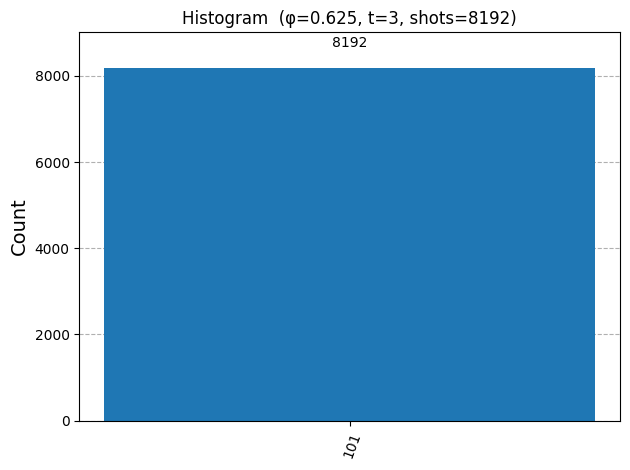

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t=4  | k=1010 | φ̂=0.625000 | |φ̂-φ|=0.000000


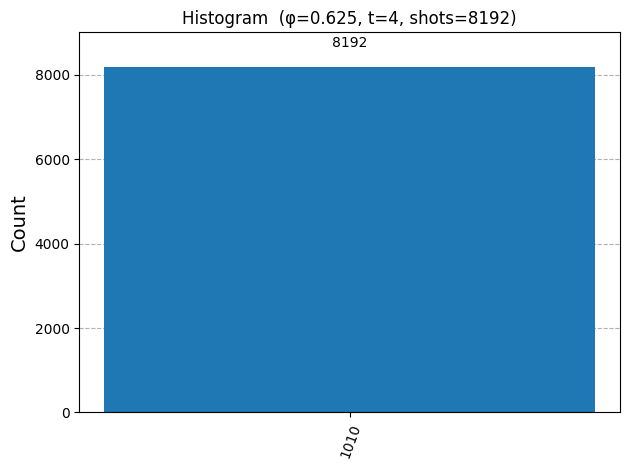

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t=5  | k=10100 | φ̂=0.625000 | |φ̂-φ|=0.000000


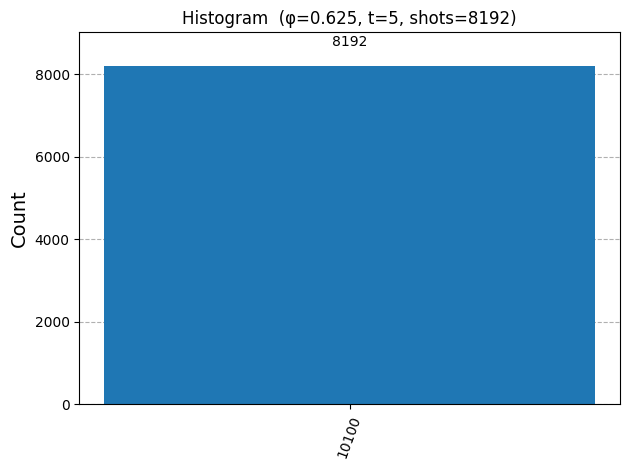

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t=6  | k=101000 | φ̂=0.625000 | |φ̂-φ|=0.000000


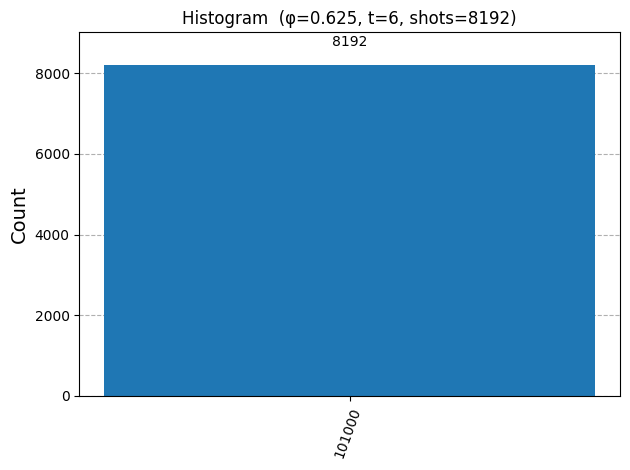

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t=7  | k=1010000 | φ̂=0.625000 | |φ̂-φ|=0.000000


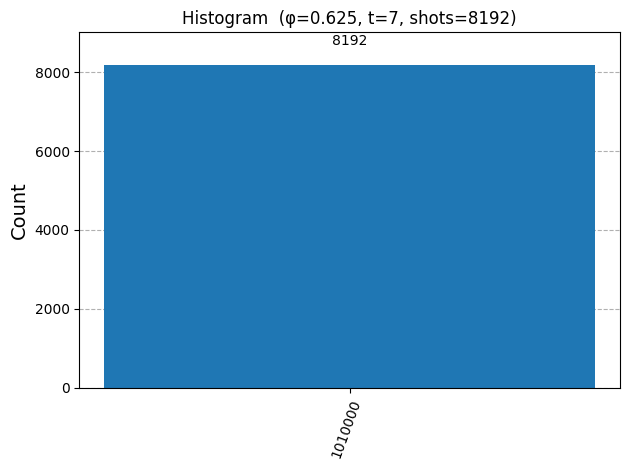

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t=8  | k=10100000 | φ̂=0.625000 | |φ̂-φ|=0.000000


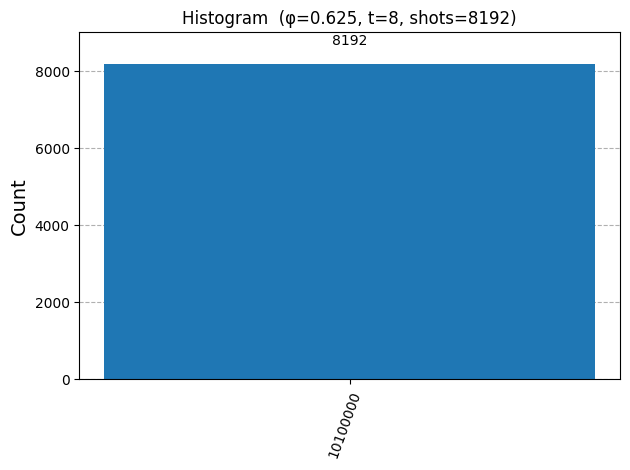


===== φ = 0.428571428571429 =====
t=3  | k=011 | φ̂=0.375000 | |φ̂-φ|=0.053571


C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


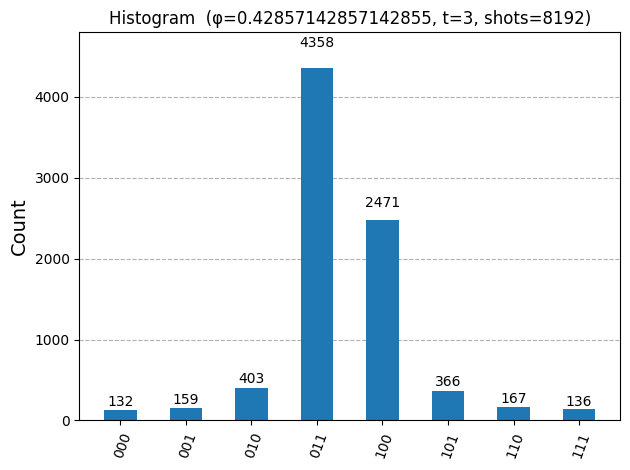

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t=4  | k=0111 | φ̂=0.437500 | |φ̂-φ|=0.008929


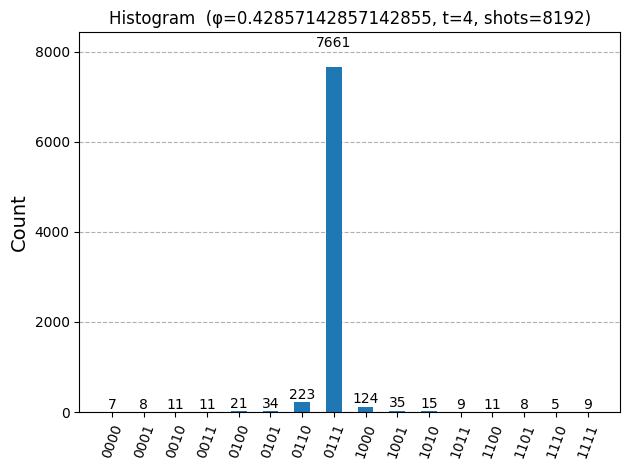

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t=5  | k=01110 | φ̂=0.437500 | |φ̂-φ|=0.008929


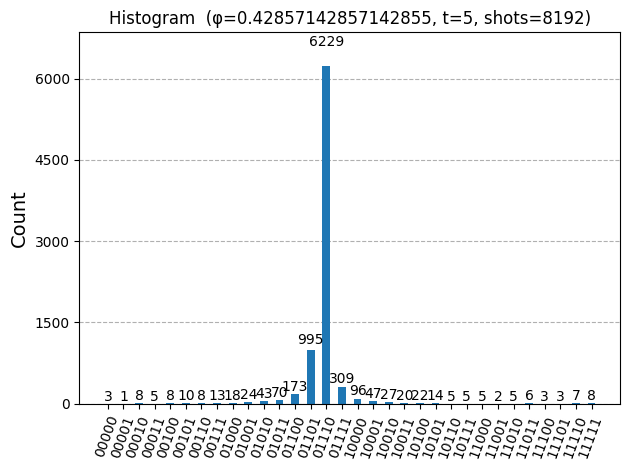

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t=6  | k=011011 | φ̂=0.421875 | |φ̂-φ|=0.006696


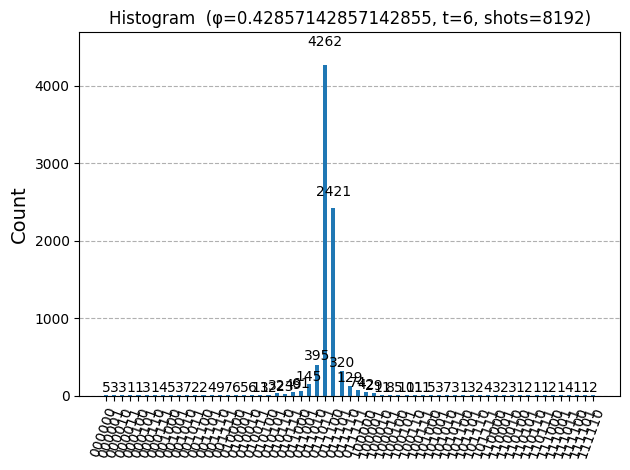

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t=7  | k=0110111 | φ̂=0.429688 | |φ̂-φ|=0.001116


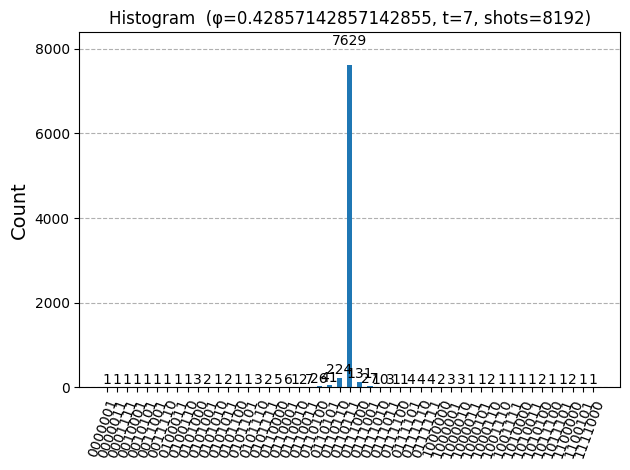

C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\1379245309.py:27: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t=8  | k=01101110 | φ̂=0.429688 | |φ̂-φ|=0.001116


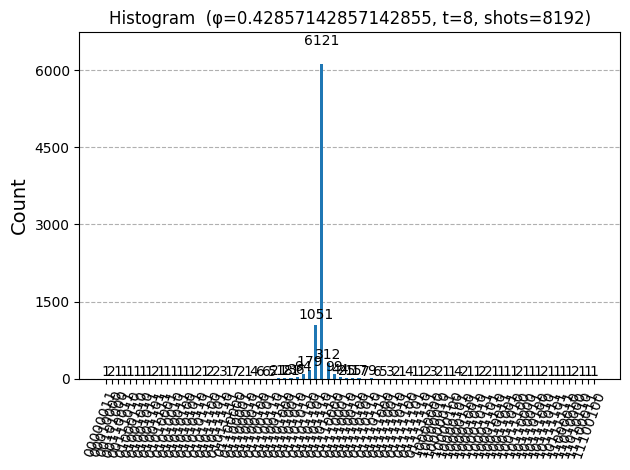

In [ ]:
%matplotlib inline
import numpy as np, math
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT, UnitaryGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


# QPE Function
def create_qpe_circuit(num_ancilla: int,
                       U_gate: UnitaryGate,
                       state_prep: QuantumCircuit) -> QuantumCircuit:
    n_target = state_prep.num_qubits
    U_mat    = U_gate.to_matrix()
    qc = QuantumCircuit(num_ancilla + n_target, num_ancilla)
    qc.h(range(num_ancilla))
    qc.compose(state_prep, qubits=list(range(num_ancilla,
                                             num_ancilla+n_target)),
               inplace=True)
    for j in range(num_ancilla):
        mat_pow = np.linalg.matrix_power(U_mat, 2**j)
        qc.append(UnitaryGate(mat_pow).control(),
                  [j] + list(range(num_ancilla,
                                   num_ancilla+n_target)))
    qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),
               range(num_ancilla), inplace=True)
    qc.measure(range(num_ancilla), range(num_ancilla))
    return qc


# Single qubit U(φ)=diag(1,e^{2πiφ})

def make_single_qubit_U(phi: float) -> UnitaryGate:
    phase = np.exp(2j * np.pi * phi)
    return UnitaryGate(np.array([[1, 0],
                                 [0, phase]]), label=f"Uφ={phi}")

# |1⟩ eigenstate
state_prep = QuantumCircuit(1)
state_prep.x(0)


# Experiment Parameter
phases      = [5/8, 3/7]           
t_range     = range(3, 9)          
SHOTS       = 8_192               
backend     = AerSimulator()
visualize_t = {3,4,5,6,7,8}       


# Run
for phi in phases:
    print(f"\n===== φ = {phi:.15f} =====")
    U_gate = make_single_qubit_U(phi)

    for t in t_range:

        qc = create_qpe_circuit(t, U_gate, state_prep)
        counts = backend.run(transpile(qc, backend),
                             shots=SHOTS).result().get_counts()

        k_bin = max(counts, key=counts.get)
        est   = int(k_bin, 2) / 2**t
        err   = abs(est - phi)
        print(f"t={t:<2} | k={k_bin:<{t}} | φ̂={est:0.6f} | |φ̂-φ|={err:0.6f}")

        if t in visualize_t:
            plot_histogram(counts,
                           title=f"Histogram  (φ={phi}, t={t}, shots={SHOTS})")
            plt.show()


C:\Users\jshsy\AppData\Local\Temp\ipykernel_15972\2897313711.py:25: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t= 3 | φ̂(max)=0.375000 | weighted error=9.284e-02
t= 4 | φ̂(max)=0.437500 | weighted error=1.520e-02
t= 5 | φ̂(max)=0.437500 | weighted error=2.256e-02
t= 6 | φ̂(max)=0.421875 | weighted error=1.794e-02
t= 7 | φ̂(max)=0.429688 | weighted error=2.519e-03
t= 8 | φ̂(max)=0.429688 | weighted error=3.800e-03
t= 9 | φ̂(max)=0.427734 | weighted error=3.069e-03
t=10 | φ̂(max)=0.428711 | weighted error=3.721e-04
t=11 | φ̂(max)=0.428711 | weighted error=4.805e-04
t=12 | φ̂(max)=0.428467 | weighted error=5.456e-04


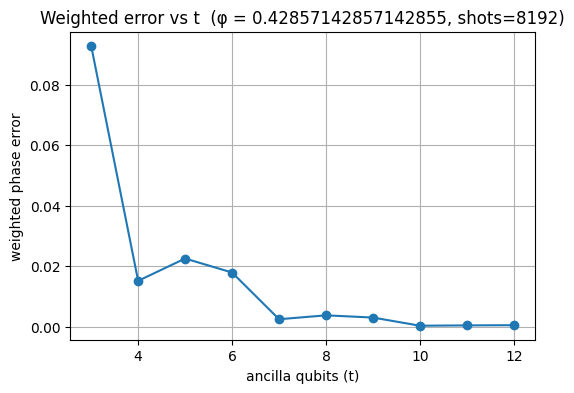

In [ ]:
%matplotlib inline
import numpy as np, math
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import UnitaryGate, QFT
from qiskit_aer import AerSimulator

def create_qpe_circuit(num_ancilla: int,
                       U_gate: UnitaryGate,
                       state_prep: QuantumCircuit) -> QuantumCircuit:
    n_target = state_prep.num_qubits
    U_mat    = U_gate.to_matrix()
    qc = QuantumCircuit(num_ancilla + n_target, num_ancilla)
    qc.h(range(num_ancilla))
    qc.compose(state_prep,
               qubits=list(range(num_ancilla,
                                 num_ancilla+n_target)),
               inplace=True)
    for j in range(num_ancilla):
        mat_pow = np.linalg.matrix_power(U_mat, 2**j)
        qc.append(UnitaryGate(mat_pow).control(),
                  [j] + list(range(num_ancilla,
                                   num_ancilla+n_target)))
    qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),
               range(num_ancilla), inplace=True)
    qc.measure(range(num_ancilla), range(num_ancilla))
    return qc

def make_U_phi(phi: float) -> UnitaryGate:
    phase = np.exp(2j * math.pi * phi)
    return UnitaryGate(np.array([[1,0],[0,phase]]), label="Uφ")

state_prep = QuantumCircuit(1)
state_prep.x(0)               

# Experiment Parameter
phi        = 3/7
t_range    = range(3, 13)       # ancilla bit 수 3‥12
SHOTS      = 8192
backend    = AerSimulator()

weighted_err = []

U_gate = make_U_phi(phi)       

for t in t_range:
    qc = create_qpe_circuit(t, U_gate, state_prep)

    counts = backend.run(transpile(qc, backend), shots=SHOTS)\
                    .result().get_counts()

    err_phi = sum(
        abs(int(bit, 2) / (2**t) - phi) * c
        for bit, c in counts.items()
    ) / SHOTS
    weighted_err.append((t, err_phi))

    k_bin = max(counts, key=counts.get)
    est   = int(k_bin, 2) / 2**t
    print(f"t={t:2d} | φ̂(max)={est:.6f} | weighted error={err_phi:.3e}")


ts, es = zip(*weighted_err)
plt.figure(figsize=(6,4))
plt.plot(ts, es, marker='o')
plt.xlabel("ancilla qubits (t)")
plt.ylabel("weighted phase error")
plt.title(f"Weighted error vs t  (φ = {phi}, shots={SHOTS})")
plt.grid(True)
plt.show()


◎ Real backend = ibm_aachen  (156 qubits)


C:\Users\82108\AppData\Local\Temp\ipykernel_28200\2189992812.py:35: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),


t= 3 | φ̂(max)=0.375000 | weighted error=1.067e-01
t= 4 | φ̂(max)=0.437500 | weighted error=5.160e-02
t= 5 | φ̂(max)=0.437500 | weighted error=7.510e-02
t= 6 | φ̂(max)=0.421875 | weighted error=8.130e-02
t= 7 | φ̂(max)=0.429688 | weighted error=8.632e-02
t= 8 | φ̂(max)=0.429688 | weighted error=9.414e-02
t= 9 | φ̂(max)=0.427734 | weighted error=1.415e-01
t=10 | φ̂(max)=0.366211 | weighted error=1.747e-01
t=11 | φ̂(max)=0.366211 | weighted error=1.939e-01
t=12 | φ̂(max)=0.412842 | weighted error=1.917e-01


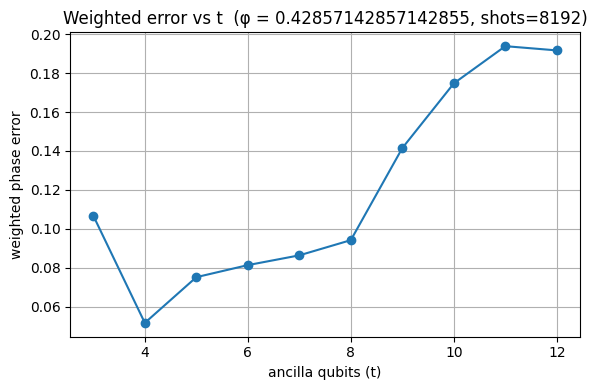

In [ ]:
import math, numpy as np, matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate, QFT         
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
try:
    from qiskit_ibm_runtime import SamplerV2 as Sampler      
except ImportError:
    from qiskit_ibm_runtime import Sampler          


def create_qpe_circuit(num_ancilla: int,
                       U_gate: UnitaryGate,
                       state_prep: QuantumCircuit) -> QuantumCircuit:
    n_target = state_prep.num_qubits
    U_mat    = U_gate.to_matrix()
    qc = QuantumCircuit(num_ancilla + n_target, num_ancilla)

    qc.h(range(num_ancilla))
    qc.compose(state_prep,
               qubits=range(num_ancilla, num_ancilla+n_target),
               inplace=True)

    for j in range(num_ancilla):
        mat_pow = np.linalg.matrix_power(U_mat, 2**j)
        qc.append(UnitaryGate(mat_pow).control(),
                  [j] + list(range(num_ancilla, num_ancilla+n_target)))

    qc.compose(QFT(num_ancilla, do_swaps=True).inverse(),
               qubits=range(num_ancilla),
               inplace=True)

    qc.measure(range(num_ancilla), range(num_ancilla))
    return qc


def make_U_phi(phi: float) -> UnitaryGate:
    phase = np.exp(2j * math.pi * phi)
    return UnitaryGate([[1, 0], [0, phase]], label="Uφ")

state_prep = QuantumCircuit(1)
state_prep.x(0)                       

service  = QiskitRuntimeService()                      
backend  = service.least_busy(simulator=False, operational=True)
print(f"◎ Real backend = {backend.name}  ({backend.num_qubits} qubits)")

sampler  = Sampler(backend)


phi        = 3/7
t_range    = range(3, 13)            
SHOTS      = 8192

weighted_err = []


U_gate = make_U_phi(phi)

for t in t_range:
    if t + 1 > backend.num_qubits:
        print(f"t={t}: skipped (insufficient qubits)")
        continue

    qc  = create_qpe_circuit(t, U_gate, state_prep)

    isa = generate_preset_pass_manager(
            backend=backend, optimization_level=1).run(qc)

    job   = sampler.run([isa], shots=SHOTS)
    pub   = job.result()[0]
    counts = pub.join_data().get_counts()          # bitstring → count

    # Weighted Error
    err = sum(abs(int(b, 2)/(2**t) - phi) * c for b, c in counts.items()) / SHOTS
    weighted_err.append((t, err))

    k_bin = max(counts, key=counts.get)
    est   = int(k_bin, 2) / 2**t
    print(f"t={t:2d} | φ̂(max)={est:.6f} | weighted error={err:.3e}")


if weighted_err:
    ts, es = zip(*weighted_err)
    plt.figure(figsize=(6,4))
    plt.plot(ts, es, marker='o')
    plt.xlabel("ancilla qubits (t)")
    plt.ylabel("weighted phase error")
    plt.title(f"Weighted error vs t  (φ = {phi}, shots={SHOTS})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
